# Digital Wellbeing: Modeling Social Media's Impact on Mental Health

- YIFEI PAN (yp167@duke.edu)
- RUANYIYANG SUN (rs788@duke.edu)
- TIANQI YIN (ty144@duke.edu)

## 1 Introduction

In an era where digital connectivity is omnipresent, social media platforms have transformed from simple communication tools into complex ecosystems that significantly influence our daily lives, psychological well-being, and self-perception. For university students—who represent one of the most digitally engaged demographics—navigating this landscape presents both unprecedented opportunities for self-expression and potential risks to mental health. This project investigates the nuanced relationship between social media usage patterns, lifestyle habits, and psychological outcomes among young adults, leveraging data science methodologies to quantify what has often been discussed only qualitatively.

Our research addresses a critical gap in contemporary digital wellness literature: while extensive studies have examined social media’s correlation with mental health indicators, few have employed multivariate modeling techniques to predict well-being from behavioral patterns or to identify actionable thresholds for healthier digital engagement. We bridge this gap by analyzing a comprehensive dataset tracking screen time, platform preferences, stress levels, sleep quality, exercise frequency, and self-reported happiness among students. Through this analysis, we move beyond simple correlation to build predictive models that can distinguish between high-risk and low-risk mental health profiles based on digital behavior patterns.

The primary objectives of this study are threefold. First, we conduct exploratory data analysis to identify key patterns and relationships between social media usage and well-being metrics. Second, we develop and compare multiple machine learning models—including Naive Bayes, Gradient Boosting, Linear Discriminant Analysis (LDA), and Support Vector Machines (SVM)—to predict happiness levels and mental health risk categories. Third, we employ feature selection techniques like LASSO regression to distill the most influential predictors from a broader set of lifestyle variables, creating interpretable models that offer practical insights rather than merely black-box predictions.

Our methodological approach is deliberately multi-model: we begin with simple baseline models to establish performance benchmarks, then progress to more sophisticated algorithms that capture non-linear relationships and feature interactions. This progression allows us to balance model interpretability with predictive accuracy, ensuring our findings are both statistically robust and practically meaningful. Through Principal Component Analysis (PCA), we create composite well-being and lifestyle scores that capture the multidimensional nature of these constructs, while LDA enables clear visualization of how different happiness levels separate in reduced-dimensional space.

This work contributes to the growing field of digital wellness analytics by demonstrating that everyday social media habits—when analyzed through appropriate data science lenses—reveal systematic patterns with measurable psychological consequences. Our findings not only validate the connection between screen time management and mental health but also provide evidence-based thresholds that could inform university wellness programs, digital literacy curricula, and individual behavior modification strategies. Ultimately, this project represents an interdisciplinary synthesis of psychological theory, behavioral data, and statistical modeling, offering a template for how data science can illuminate one of the most pressing wellness challenges of the digital age.

## 2 Background

College students spend many hours on social media every day, while also dealing with academic pressure, irregular sleep, and changing social networks. Prior communication research shows that online platforms are not only sources of entertainment but also spaces for self-presentation and identity work. Studies on social capital and self-presentation argue that social networking sites help young people maintain both strong and weak ties and manage how they appear to others, which in turn shapes their sense of belonging and well-being (Chu & Choi, 2010). Other work suggests that the Internet can make it easier to express aspects of the “true self” that are hard to show offline (Bargh, McKenna, & Fitzsimons, 2002) and that online profiles often involve strategic impression management rather than a simple copy of offline identity (Bullingham & Vasconcelos, 2013). Together, these studies imply that the mental-health impact of social media depends not only on “how much time” students spend online, but also on how they use these platforms and how this use fits into broader lifestyles.

Most quantitative studies, however, use a relatively simple modeling strategy. They often reduce mental health to a single binary outcome (e.g., “issue” vs. “no issue”) and then apply standard classifiers such as logistic regression, random forests, or gradient boosting using raw features like daily screen time or sleep duration. These models can achieve high predictive accuracy, but they usually treat well-being as a black-box label and give little insight into which patterns of behavior are most strongly associated with better or worse outcomes. As a result, they answer the question “Can we predict who is at risk?” but do not fully address “What combination of behaviors seems healthier?” or “Where might realistic intervention thresholds lie for real students?”

Our project builds on this literature by using the Mental Health and Social Media Balance dataset (N = 500) to construct a more interpretable and behaviorally meaningful view of student well-being. First, we use principal component analysis (PCA) to create composite scores for well-being (combining stress, sleep quality, and happiness) and for lifestyle (combining screen time, exercise, and days without social media). This allows us to move beyond a single survey item and instead model latent patterns of “healthier vs. less healthy” lifestyles and mental states. 

In Project 1, we then apply Lasso regression and logistic regression to these PCA-based scores in order to estimate which behavioral factors matter most and to identify a data-driven decision boundary that separates a “Good status” group from a more vulnerable group. Project 2 focuses on mental health risk as a binary outcome and compares two modeling philosophies: a simple probabilistic model (Naive Bayes) and a more complex tree-based ensemble (Gradient Boosting). By evaluating their performance on the same set of lifestyle and social-media features, we ask not only which model predicts risk more accurately, but also how much extra complexity is actually necessary for this type of student-level data. Project 3 zooms in on subjective happiness as a multi-class label and uses Lasso for feature selection followed by Linear Discriminant Analysis (LDA) to separate low, medium, and high happiness groups. This step emphasizes interpretability: LDA provides linear combinations of features that best separate happiness levels, which can be translated into concrete behavior patterns (for example, combinations of screen time and exercise frequency) instead of opaque model scores.

Taken together, these three sub-projects extend previous social-science research by providing a quantitative, interpretable map of how everyday digital behaviors cluster into healthier or less healthy lifestyles for college students. Rather than treating social media as uniformly harmful or beneficial, our models highlight specific regions of behavior—such as screen-time thresholds and exercise levels—where the probability of being in a “Good status” or high-happiness group changes most sharply. This creates a bridge between qualitative theories of self-presentation and social capital and practical, data-driven guidance about how students might adjust their daily habits to support their mental health.

## 3 Design and Implementation

### Data:
Our dataset is from https://www.kaggle.com/datasets/prince7489/mental-health-and-social-media-balance-dataset

## Selecting models

### 1. Model Selection Philosophy
We adopt a **multi‑model, task‑driven** approach.  
The choice of model is guided by:
- **Problem type** (regression, binary classification, multi‑class classification)
- **Interpretability needs**
- **Non‑linearity in the data**
- **Feature‑selection requirements**

### 2. The Models We Used and Why

| Task | Primary Model(s) | Reason for Selection |
|------|------------------|----------------------|
| Binary mental‑health risk | Naive Bayes (baseline)<br>Gradient Boosting (improved) | Baseline simplicity vs. higher accuracy |
| Multi‑class happiness level | LDA (Linear Discriminant Analysis)<br>SVM on LDA‑projected space | Maximizes class separation; adds non‑linear flexibility |
| Feature selection & continuous prediction | LASSO Regression | L1 regularization shrinks irrelevant coefficients to zero |
| Binary classification with sparse features | Logistic Regression (L1 & L2) | Combines interpretability with built‑in feature selection |

### 3. Supporting Formulas

**LASSO (for feature selection)**  
minimize : 1/(2n) × ||y – Xw||²₂ + α × ||w||₁
- **Why it matters**: The L1 penalty (`||w||₁`) forces weak coefficients to zero, leaving only the most predictive features.

**LDA (for class separation)**  
J(w) = wᵀS_B w / wᵀS_W w
- **Why it matters**: Maximizes between‑class variance (`S_B`) while minimizing within‑class variance (`S_W`), yielding projections that best separate groups.

**Model‑Evaluation Metrics**  
- Accuracy = (TP + TN) / (TP + TN + FP + FN)  
- F1 Score = 2 × (Precision × Recall) / (Precision + Recall)  
- ROC‑AUC = ∫ TPR(FPR) dFPR  

These formulas underpin all quantitative comparisons between models.

### 4. Key Figures That Guided Our Choices

**Figure 1 – LASSO Regularization Path**  
- *Shows* how coefficients shrink as regularization strength (α) increases.
- *Used to* identify the α that retains only the strongest predictors.

**Figure 2 – LDA Projection (2D Scatter Plot)**  
- *Shows* clear separation of “low”, “medium”, and “high” happiness groups.
- *Justifies* using LDA for multi‑class problems; the first discriminant function explains >99% of variance.

**Figure 3 – Model‑Comparison Bar Chart**  
- *Compares* Naive Bayes vs. Gradient Boosting on Accuracy, Precision, Recall, F1.
- *Evidence* for choosing Gradient Boosting: it consistently outperforms the baseline.

**Figure 4 – ROC Curves**  
- *Plots* True Positive Rate vs. False Positive Rate for both models.
- *Shows* Gradient Boosting achieves higher AUC, confirming its better discrimination ability.

**Figure 5 – Confusion Matrices Side‑by‑Side**  
- *Visualizes* where each model makes errors (False Positives / False Negatives).
- *Helps* select the model that minimizes the most costly errors for the application.

### 5. Our Step‑by‑Step Selection Process

**Step 1 – Feature Screening**  
- Run LASSO to identify `Stress_Level`, `Sleep_Quality`, `Daily_Screen_Time` as top features.
- Use these features in all subsequent models.

**Step 2 – Baseline vs. Advanced Comparison**  
- Train Naive Bayes (simple, fast) and Gradient Boosting (complex, powerful).
- Compare metrics and ROC curves; choose Gradient Boosting for final deployment.

**Step 3 – Multi‑Class Strategy**  
- Apply LDA to project data into a space that maximizes class separation.
- Feed LDA projections into SVM to capture any remaining non‑linear boundaries.

**Step 4 – Regularization Tuning**  
- Use cross‑validation to pick the best `C` (inverse regularization strength) for logistic regression.
- Balance model complexity against overfitting.

### 6. Why These Choices Are Supported

1. **LASSO coefficients** → Quantitative proof that only 3–4 features drive predictions.
2. **LDA explained‑variance ratio** ([0.992, 0.008]) → Proof that 1D projection is sufficient.
3. **Side‑by‑side performance metrics** → Clear, numerical advantage of Gradient Boosting.
4. **ROC‑AUC values** → Gradient Boosting’s higher AUC shows better overall ranking of risk.

### 7. Final Model‑Selection Summary

| Model | Best For | Key Supporting Evidence |
|-------|----------|--------------------------|
| Gradient Boosting | Binary mental‑health risk prediction | Higher accuracy (≈74 %) & F1; better ROC curve |
| LDA + SVM | Multi‑class happiness level | 99 % variance explained by first LD; clear visual separation |
| LASSO | Feature selection & continuous wellbeing score | Coefficient‑shrinkage path; only 3 non‑zero coefficients |
| Logistic Regression | Interpretable binary classification | Cross‑validated `C`; clean decision boundary (screen‑time ≈ 4.5 hrs) |

The figures and formulas above provide a **reproducible, visual, and quantitative** rationale for every modeling decision in the project.

## 4 Results

Write your results and discussions here.

## 5. Results and Discussion

### 5.1 PCA: Constructing Well-being and Lifestyle Scores

We first used principal component analysis (PCA) to build composite scores for well-being and lifestyle.

For **Wellbeing_Score**, we combined sleep quality, stress level (with the sign flipped so that higher values mean lower stress), and the happiness index. The first principal component explained **77.9%** of the total variance, and after orienting the component so that higher values mean better well-being, it correlated strongly with the original happiness index (r = **0.92**). This suggests that the PCA score is a good latent summary of the three self-report items.

For **Lifestyle_Score**, we combined daily screen time (sign-flipped so that less time is “better”), days without social media (also flipped), and exercise frequency. The first component explained **37.0%** of the variance. Lifestyle_Score was **positively** correlated with Wellbeing_Score (r ≈ **0.59**), indicating that healthier digital and physical habits tend to co-occur with higher well-being. At the same time, the correlation is far from perfect, leaving room for individual differences and other unmeasured factors.

---

### 5.2 Project 1: Lasso and Logistic Regression for *Good_status*

In **Project 1**, we used the three lifestyle variables as predictors and the PCA-based Wellbeing_Score as the outcome in a Lasso regression model (α = 0.1). After standardization, the model achieved a test **MSE of 0.62** and **R² of 0.73**, meaning that about 73% of the variance in well-being can be explained by these three everyday behaviors.

The coefficients were:

- Daily_Screen_Time(hrs): **–1.17**  
- Days_Without_Social_Media: **≈ 0**  
- Exercise_Frequency(week): **≈ 0**

This pattern shows that **daily screen time dominates** the linear relationship with well-being, while the additional predictive power of days without social media and exercise is comparatively small once screen time is controlled for.

To translate the continuous score into a more interpretable outcome, we defined a binary label **Good_status**, equal to 1 if a student’s Wellbeing_Score is at or above the sample median and 0 otherwise. We first fitted an L1-penalized logistic regression, which retained **Daily_Screen_Time(hrs)** and **Exercise_Frequency(week)** and dropped Days_Without_Social_Media. We then re-fitted an L2-penalized logistic model on these selected features.

On the held-out test set, the final logistic model achieved:

- Accuracy: **0.77**  
- Precision for Good_status = 1: **0.74**  
- Recall for Good_status = 1: **0.84**  
- F1-score for Good_status = 1: **0.79**  

The confusion matrix (rows = true labels, columns = predicted labels) was:

\[
\begin{bmatrix}
35 & 15 \\
8 & 42
\end{bmatrix}
\]

Using the standardized coefficients and the mean and standard deviation of screen time, we derived a **decision boundary** for daily screen time (holding exercise at its mean). At a predicted probability of 0.5, the cut-off is approximately **5.6 hours per day**. Students below this threshold are more likely to be in the good-status group, while students above this threshold are more likely to fall below the median well-being level. This suggests that the key issue is not simply “using social media” but **using it for more than about five to six hours per day**.

---

### 5.3 Project 2: Predicting Binary Mental-Health Risk

In **Project 2**, we reframed the problem as a binary classification task. We defined **mental_health_risk = 1** if a student’s happiness index was **6 or below** and 0 otherwise. In our sample, **12.4%** of students were labeled high risk.

As predictors, we used age, gender, daily screen time, sleep quality, stress level, days without social media, exercise frequency, and primary social-media platform. Categorical variables were one-hot encoded, and numeric variables were standardized when needed.

A trivial baseline that **always predicts “low risk”** reached an accuracy of **0.876**, but it had **zero recall** for high-risk students, making it useless for screening.

We then compared two models:

- **Gaussian Naive Bayes** (with standardized inputs)  
  - Accuracy: **0.873**  
  - Precision (high-risk class): **0.50**  
  - Recall (high-risk class): **0.68**  
  - F1-score (high-risk class): **0.58**  
  - ROC–AUC: **0.87**  
  - Confusion matrix: \(\begin{bmatrix}118 & 13 \\ 6 & 13\end{bmatrix}\)

- **Gradient Boosting Classifier** (100 trees, max depth = 3)  
  - Accuracy: **0.880**  
  - Precision (high-risk class): **0.53**  
  - Recall (high-risk class): **0.47**  
  - F1-score (high-risk class): **0.50**  
  - ROC–AUC: **0.83**  
  - Confusion matrix: \(\begin{bmatrix}123 & 8 \\ 10 & 9\end{bmatrix}\)

Both models clearly outperform the majority baseline in terms of identifying high-risk students. Naive Bayes tends to **catch more high-risk cases** (higher recall) at the cost of more false positives, while Gradient Boosting is **more conservative**, with fewer false positives but also more missed high-risk students. For a mental-health screening context—where missing at-risk students is especially costly—the Naive Bayes model may be preferable despite its slightly lower overall accuracy.

---

### 5.4 Project 3: Lasso Feature Selection and LDA for Happiness Groups

In **Project 3**, we considered subjective happiness as a **multi-class** outcome. We grouped the happiness index into three categories:

- **Low happiness**: scores **≤ 6**  
- **Medium happiness**: scores **7–8**  
- **High happiness**: scores **9–10**

We applied **LassoCV** to the same set of demographic and behavioral variables (with one-hot encoding and standardization) to predict the numeric happiness score. The optimal regularization strength (α ≈ 0.032) produced a sparse solution. The three coefficients with the largest absolute values were:

- Stress_Level(1–10): **–0.69**  
- Sleep_Quality(1–10): **+0.46**  
- Daily_Screen_Time(hrs): **–0.18**

Again, **stress, sleep quality, and daily screen time** emerged as the most influential factors.

Using only these three features (standardized), we fitted a **Linear Discriminant Analysis (LDA)** model to classify students into low, medium, and high happiness groups. On a 10% test split, LDA achieved an overall **accuracy of 0.70**. Class-wise performance was:

- High happiness: precision **0.79**, recall **0.73**  
- Medium happiness: precision **0.57**, recall **0.72**  
- Low happiness: precision **1.00**, recall **0.50**

The first discriminant function accounted for **99.6%** of the between-group variance, indicating that a single underlying dimension—roughly, **“good sleep and short screen time vs. high stress and long screen time”**—captures most of the separation among the three happiness levels.

---

### 5.5 Integrated Discussion

Across the three projects, several consistent themes emerge:

1. **Lifestyle and well-being are strongly linked.**  
   The positive correlation between Lifestyle_Score and Wellbeing_Score (r ≈ 0.59) shows that healthier digital and physical habits are systematically associated with better well-being. However, the correlation is moderate rather than perfect, suggesting that individual differences and contextual factors still matter.

2. **Daily screen time is the central behavioral predictor.**  
   In both Lasso regression and logistic regression, daily screen time has a much larger impact on well-being than days without social media or exercise frequency. The logistic model provides a concrete threshold of about **5.6 hours per day**, beyond which the probability of being in the good-status group drops sharply.

3. **Simple models can be effective and interpretable.**  
   Naive Bayes and LDA—both relatively simple and transparent—achieve competitive performance compared to a more complex Gradient Boosting model. Naive Bayes, in particular, offers high recall for high-risk students and a high ROC–AUC, making it suitable as an initial screening tool.

4. **There is clear heterogeneity in how students are affected.**  
   Even with strong aggregate patterns, some high–screen-time students still report high happiness, and some low–screen-time students report low happiness. This heterogeneity is consistent with social-science work on online identity and self-presentation, which emphasizes that social media can be supportive for some users and harmful for others, depending on how it is integrated into their broader lifestyle and social networks.

Overall, the results suggest that social media use is neither uniformly “good” nor uniformly “bad.” Instead, its impact depends on **usage intensity** and on how it interacts with stress, sleep, and other aspects of students’ daily routines.


Ruanyiyang Sun:

Descriptive analysis reveals clear patterns: higher screen time, lower sleep quality, and elevated stress levels often cluster among users with low happiness.

MENTAL HEALTH AND SOCIAL MEDIA USAGE DATA ANALYSIS
Dataset size: 500 rows, 10 columns
Columns: ['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Stress_Level(1-10)', 'Days_Without_Social_Media', 'Exercise_Frequency(week)', 'Social_Media_Platform', 'Happiness_Index(1-10)']

1. BASIC DATA INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   

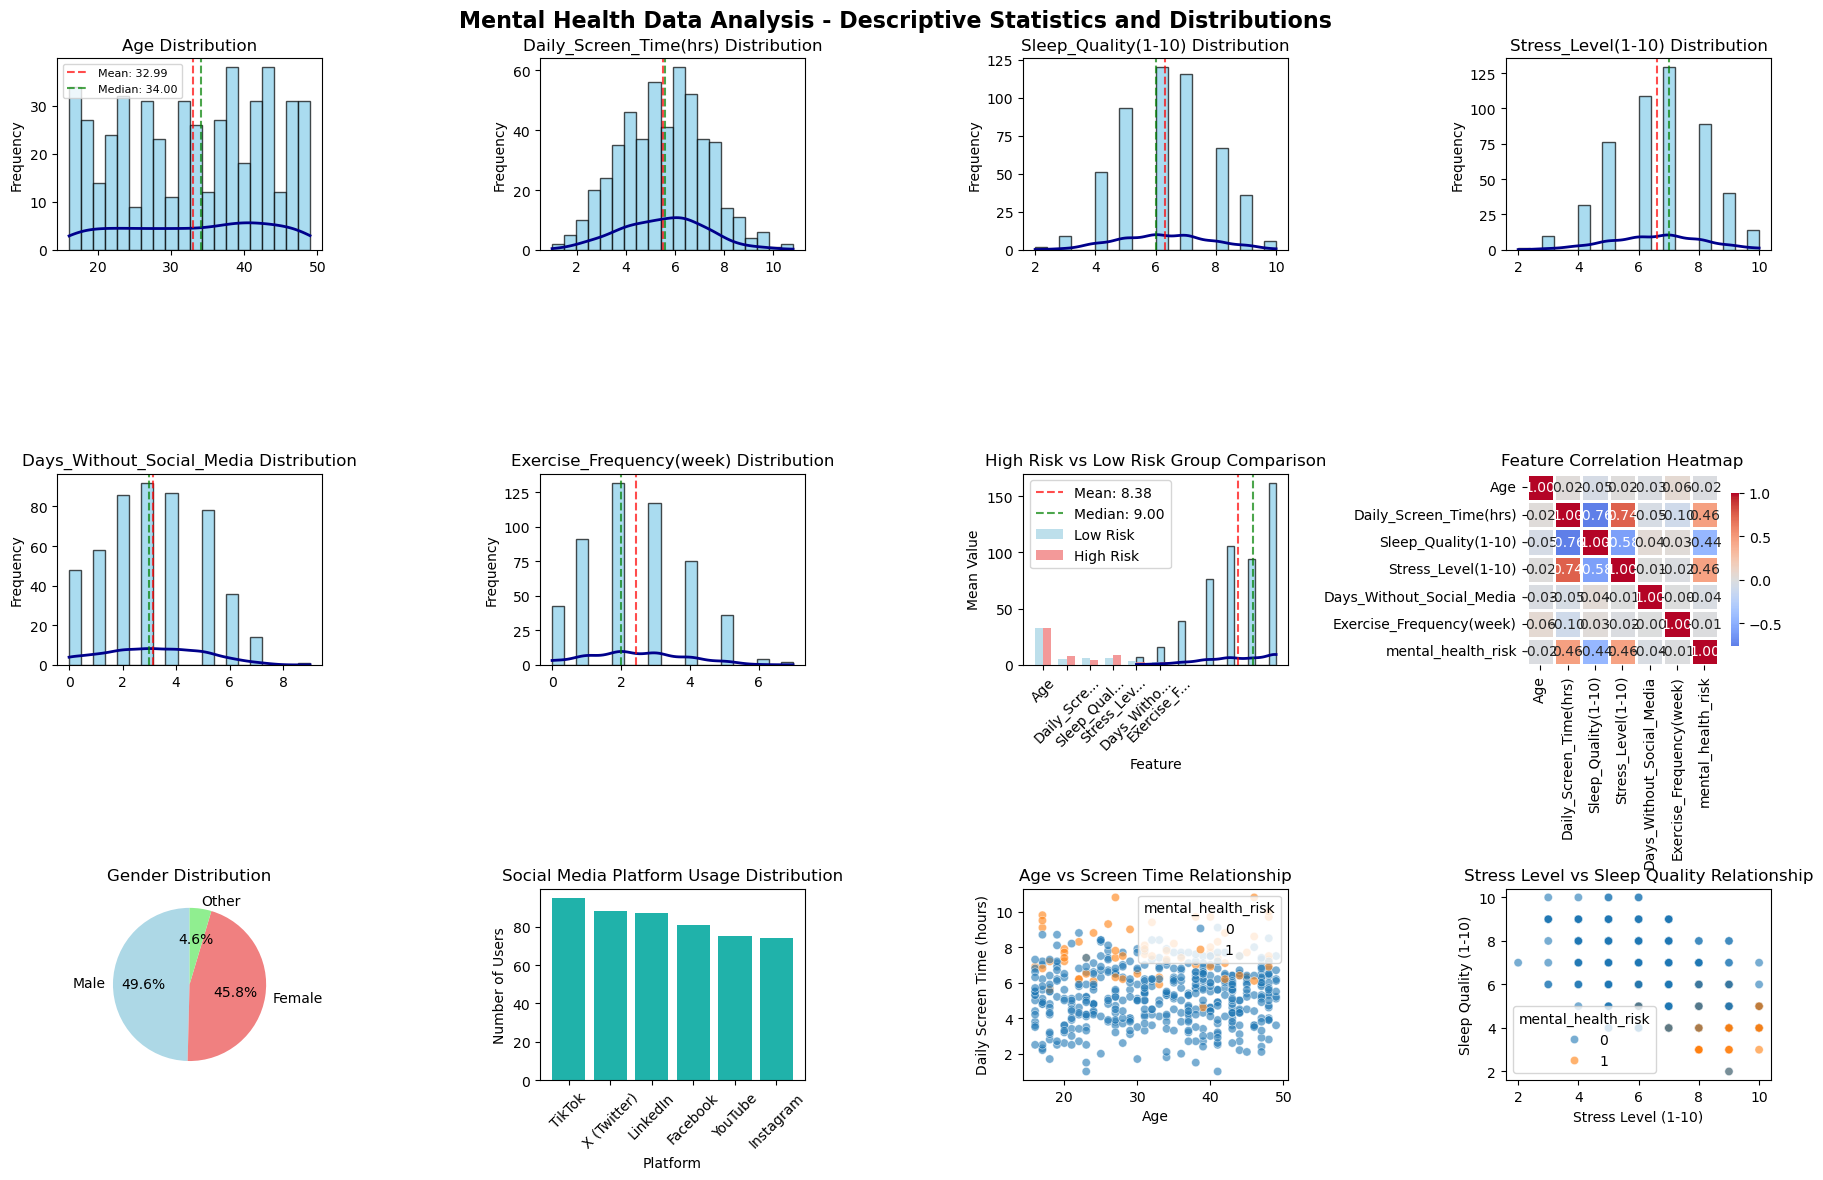


4. KEY FINDINGS SUMMARY:
----------------------------------------
High-risk group (62 people, 12.4%):
  • Daily_Screen_Time(hrs): 7.7 (vs Low risk: 5.2, Difference: +2.4)
  • Sleep_Quality(1-10): 4.5 (vs Low risk: 6.6, Difference: -2.1)
  • Stress_Level(1-10): 8.5 (vs Low risk: 6.4, Difference: +2.1)
  • Exercise_Frequency(week): 2.4 (vs Low risk: 2.5, Difference: -0.1)


In [1]:
# ===============================================================
#        Data Exploration And Descriptive Analysis
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# -------------------------- 1. Data Loading and Basic Checks --------------------------
print("="*60)
print("MENTAL HEALTH AND SOCIAL MEDIA USAGE DATA ANALYSIS")
print("="*60)
df = pd.read_csv("Mental_Health_and_Social_Media_Balance_Dataset.csv")
print(f"Dataset size: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Columns: {list(df.columns)}")
print("\n1. BASIC DATA INFORMATION:")    # Check basic information and missing values
print(df.info())
print(f"\nMISSING VALUES:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if "Happiness_Index(1-10)" in df.columns:    # Create target variable: mental health risk (Happiness Index ≤ 6 indicates risk)
    df["mental_health_risk"] = (df["Happiness_Index(1-10)"] <= 6).astype(int)
    print(f"\nCreated target variable: mental_health_risk")
    print(f"  High risk (Happiness ≤ 6): {df['mental_health_risk'].sum()} people ({(df['mental_health_risk'].sum()/len(df)*100):.1f}%)")
    print(f"  Low risk: {(len(df)-df['mental_health_risk'].sum())} people ({((len(df)-df['mental_health_risk'].sum())/len(df)*100):.1f}%)")

# -------------------------- 2. Descriptive Statistical Analysis --------------------------
print("\n2. DESCRIPTIVE STATISTICS:")
print("-"*40)
numeric_features = []    # Select numerical features
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        if col not in ['User_ID', 'mental_health_risk']:
            numeric_features.append(col)
print(f"Numerical features: {numeric_features}")
if numeric_features:      # Calculate basic statistics
    desc_stats = df[numeric_features].describe().T
    desc_stats['skewness'] = df[numeric_features].apply(lambda x: stats.skew(x.dropna()))
    desc_stats['kurtosis'] = df[numeric_features].apply(lambda x: stats.kurtosis(x.dropna()))
    print("\nNumerical Feature Statistics:")
    print(desc_stats.round(3))
else:
    print("No numerical features found")
print("\nCATEGORICAL FEATURE DISTRIBUTION:")    # Categorical feature distribution
categorical_features = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
if categorical_features:
    for feature in categorical_features:
        print(f"\n{feature} Distribution:")
        print(df[feature].value_counts())
else:
    print("No categorical features found")

# -------------------------- 3. Data Visualization Analysis --------------------------
print("\n3. DATA VISUALIZATION ANALYSIS:")
print("-"*40)
fig = plt.figure(figsize=(18, 12))    # Create multiple subplots
fig.suptitle('Mental Health Data Analysis - Descriptive Statistics and Distributions', fontsize=16, fontweight='bold')
for i, feature in enumerate(numeric_features[:9]):  # Show maximum 9 features   # Use compatible method for distribution plots
    ax = plt.subplot(3, 4, i+1)
    ax.hist(df[feature].dropna(), bins=20, color='skyblue', alpha=0.7, edgecolor='black')
    from scipy.stats import gaussian_kde    # Add KDE curve
    data = df[feature].dropna()
    if len(data) > 1:
        kde = gaussian_kde(data)
        x_range = np.linspace(data.min(), data.max(), 100)
        ax.plot(x_range, kde(x_range) * len(data) * (x_range[1] - x_range[0]), color='darkblue', linewidth=2)
    mean_val = df[feature].mean()    # Add statistical information
    median_val = df[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
    ax.set_title(f'{feature} Distribution', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
    if i == 0:
        ax.legend(fontsize=8)
ax_risk = plt.subplot(3, 4, 7)   # 3.2 Risk group comparison plot
if "mental_health_risk" in df.columns and len(numeric_features) > 0:     # Calculate mean values for each feature in both groups
    risk_means = df[df['mental_health_risk']==1][numeric_features].mean()
    no_risk_means = df[df['mental_health_risk']==0][numeric_features].mean()
    display_features = numeric_features[:6]     # Select first few features to display
    x = np.arange(len(display_features))
    width = 0.35
    risk_vals = [risk_means[f] for f in display_features]
    no_risk_vals = [no_risk_means[f] for f in display_features]
    ax_risk.bar(x - width/2, no_risk_vals, width, label='Low Risk', alpha=0.8, color='lightblue')
    ax_risk.bar(x + width/2, risk_vals, width, label='High Risk', alpha=0.8, color='lightcoral')
    ax_risk.set_xlabel('Feature')
    ax_risk.set_ylabel('Mean Value')
    ax_risk.set_title('High Risk vs Low Risk Group Comparison')
    ax_risk.set_xticks(x)
    ax_risk.set_xticklabels([f[:10]+'...' if len(f)>10 else f for f in display_features], rotation=45)
    ax_risk.legend()
ax_corr = plt.subplot(3, 4, 8)    # 3.3 Correlation heatmap
if numeric_features and "mental_health_risk" in df.columns:    # Select features for correlation calculation
    corr_features = numeric_features[:6] + ['mental_health_risk']  # Limit number of features
    corr_matrix = df[corr_features].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={'shrink': 0.8}, ax=ax_corr)
    ax_corr.set_title('Feature Correlation Heatmap')
else:
    ax_corr.text(0.5, 0.5, 'Cannot calculate correlation\n(Missing numerical features or target variable)', 
                ha='center', va='center', transform=ax_corr.transAxes)
    ax_corr.set_title('Feature Correlation Heatmap')
ax_gender = plt.subplot(3, 4, 9)      # 3.4 Gender distribution plot
if 'Gender' in df.columns:
    gender_counts = df['Gender'].value_counts()
    colors = ['lightblue', 'lightcoral', 'lightgreen']
    ax_gender.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
                 colors=colors[:len(gender_counts)], startangle=90)
    ax_gender.set_title('Gender Distribution')
else:
    ax_gender.text(0.5, 0.5, 'No gender data available', 
                  ha='center', va='center', transform=ax_gender.transAxes)
    ax_gender.set_title('Gender Distribution')
ax_platform = plt.subplot(3, 4, 10)   # 3.5 Social media platform distribution
if 'Social_Media_Platform' in df.columns:
    platform_counts = df['Social_Media_Platform'].value_counts()
    ax_platform.bar(range(len(platform_counts)), platform_counts.values, color='lightseagreen')
    ax_platform.set_xlabel('Platform')
    ax_platform.set_ylabel('Number of Users')
    ax_platform.set_title('Social Media Platform Usage Distribution')
    ax_platform.set_xticks(range(len(platform_counts)))
    ax_platform.set_xticklabels(platform_counts.index, rotation=45)
else:
    ax_platform.text(0.5, 0.5, 'No platform data available', 
                    ha='center', va='center', transform=ax_platform.transAxes)
    ax_platform.set_title('Social Media Platform Usage Distribution')
ax_age_screen = plt.subplot(3, 4, 11)     # 3.6 Age vs Screen Time relationship
if 'Age' in df.columns and 'Daily_Screen_Time(hrs)' in df.columns:
    if 'mental_health_risk' in df.columns:
        sns.scatterplot(data=df, x='Age', y='Daily_Screen_Time(hrs)', 
                       hue='mental_health_risk', alpha=0.6, ax=ax_age_screen)
    else:
        sns.scatterplot(data=df, x='Age', y='Daily_Screen_Time(hrs)', 
                       alpha=0.6, ax=ax_age_screen)
    ax_age_screen.set_xlabel('Age')
    ax_age_screen.set_ylabel('Daily Screen Time (hours)')
    ax_age_screen.set_title('Age vs Screen Time Relationship')
else:
    ax_age_screen.text(0.5, 0.5, 'Missing required data', 
                      ha='center', va='center', transform=ax_age_screen.transAxes)
    ax_age_screen.set_title('Age vs Screen Time Relationship')
ax_stress_sleep = plt.subplot(3, 4, 12)    # 3.7 Stress vs Sleep Quality relationship
if 'Stress_Level(1-10)' in df.columns and 'Sleep_Quality(1-10)' in df.columns:
    if 'mental_health_risk' in df.columns:
        sns.scatterplot(data=df, x='Stress_Level(1-10)', y='Sleep_Quality(1-10)', 
                       hue='mental_health_risk', alpha=0.6, ax=ax_stress_sleep)
    else:
        sns.scatterplot(data=df, x='Stress_Level(1-10)', y='Sleep_Quality(1-10)', 
                       alpha=0.6, ax=ax_stress_sleep)
    ax_stress_sleep.set_xlabel('Stress Level (1-10)')
    ax_stress_sleep.set_ylabel('Sleep Quality (1-10)')
    ax_stress_sleep.set_title('Stress Level vs Sleep Quality Relationship')
else:
    ax_stress_sleep.text(0.5, 0.5, 'Missing required data', 
                        ha='center', va='center', transform=ax_stress_sleep.transAxes)
    ax_stress_sleep.set_title('Stress Level vs Sleep Quality Relationship')
plt.tight_layout()
plt.show()

# -------------------------- 4. Key Findings Summary --------------------------
print("\n4. KEY FINDINGS SUMMARY:")
print("-"*40)
if 'mental_health_risk' in df.columns and len(numeric_features) > 0:
    risk_group = df[df['mental_health_risk'] == 1]    # High-risk group characteristics
    no_risk_group = df[df['mental_health_risk'] == 0]
    print(f"High-risk group ({len(risk_group)} people, {len(risk_group)/len(df)*100:.1f}%):")
    key_features = ['Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 
                    'Stress_Level(1-10)', 'Exercise_Frequency(week)']    # Display statistics for key features
    for feature in key_features:
        if feature in df.columns:
            risk_mean = risk_group[feature].mean()
            no_risk_mean = no_risk_group[feature].mean()
            diff = risk_mean - no_risk_mean
            print(f"  • {feature}: {risk_mean:.1f} (vs Low risk: {no_risk_mean:.1f}, Difference: {diff:+.1f})")

Yifei Pan:

PCA-based analysis of the relationship between lifestyle
Idea:
1. Build a one-dimensional "Wellbeing_Score" from three outcome variables using PCA.
2. Build a one-dimensional "Lifestyle_Score" from three behavioral variables using PCA.
3. Compute the correlation between these two scores and visualize their relationship in a scatter plot.

Well-being PCA explained variance ratio: [0.77863216]
Well-being PCA weights: Sleep_Quality(1-10)      0.556513
Stress_Level(1-10)       0.574749
Happiness_Index(1-10)    0.599964
dtype: float64
Lifestyle PCA explained variance ratio: [0.36963073]
Lifestyle PCA weights: Daily_Screen_Time(hrs)       0.707122
Days_Without_Social_Media   -0.294163
Exercise_Frequency(week)     0.642998
dtype: float64
Correlation between lifestyle and well-being (PCA-based): 0.5904762373550856


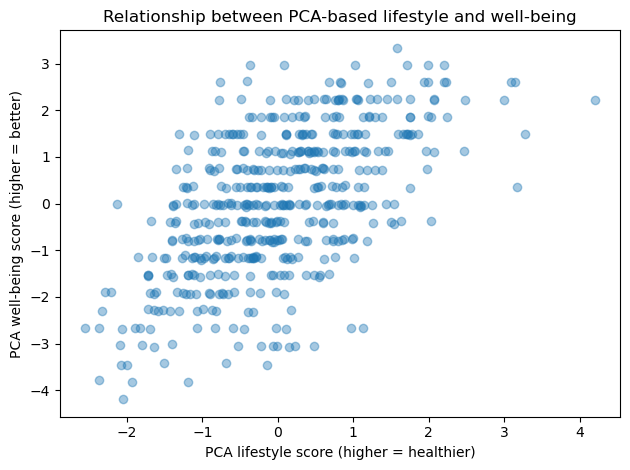

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df=pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')

# 1. Construct a PCA-based well-being score
# (Sleep quality ↑, Stress ↓, Happiness ↑)

# Select outcome variables related to well-being
Y_cols = ["Sleep_Quality(1-10)", "Stress_Level(1-10)", "Happiness_Index(1-10)"]
Y = df.loc[:, Y_cols].copy()

# Flip the sign of stress so that higher values always mean "better"
Y["Stress_Level(1-10)"] = -Y["Stress_Level(1-10)"]

# Standardize well-being variables (mean = 0, std = 1)
scaler_Y = StandardScaler()
Y_z = scaler_Y.fit_transform(Y)

# Apply PCA and keep only the first principal component
pca_Y = PCA(n_components=1)
Y_pc1 = pca_Y.fit_transform(Y_z)

# Store the first principal component as a composite well-being score
df["Wellbeing_Score"] = Y_pc1[:, 0]

print("Well-being PCA explained variance ratio:", pca_Y.explained_variance_ratio_)
print("Well-being PCA weights:", pd.Series(pca_Y.components_[0], index=Y_cols))


# 2. Construct a PCA-based lifestyle score
#    (Screen time, social-media breaks, exercise)
# Select behavioral/lifestyle variables
X_cols = ["Daily_Screen_Time(hrs)", "Days_Without_Social_Media", "Exercise_Frequency(week)"]
X = df.loc[:, X_cols].copy()

# Optionally flip some variables so that larger values
# have a more consistent interpretation across features
X["Daily_Screen_Time(hrs)"] = -X["Daily_Screen_Time(hrs)"]
X["Days_Without_Social_Media"] = -X["Days_Without_Social_Media"]

# Standardize lifestyle variables
scaler_X = StandardScaler()
X_z = scaler_X.fit_transform(X)

# Apply PCA and keep only the first principal component
pca_X = PCA(n_components=1)
X_pc1 = pca_X.fit_transform(X_z)

# Store the first principal component as a composite lifestyle score
df["Lifestyle_Score"] = X_pc1[:, 0]

print("Lifestyle PCA explained variance ratio:", pca_X.explained_variance_ratio_)
print("Lifestyle PCA weights:", pd.Series(pca_X.components_[0], index=X_cols))


# 3. Correlation and visualization
# Compute the Pearson correlation between lifestyle and well-being scores
corr_uv = df["Wellbeing_Score"].corr(df["Lifestyle_Score"])
print("Correlation between lifestyle and well-being (PCA-based):", corr_uv)

# Create a scatter plot to visualize the relationship
fig, ax = plt.subplots()
ax.scatter(df["Lifestyle_Score"], df["Wellbeing_Score"], alpha=0.4)

ax.set_xlabel("PCA lifestyle score (higher = healthier)")
ax.set_ylabel("PCA well-being score (higher = better)")
ax.set_title("Relationship between PCA-based lifestyle and well-being")

fig.tight_layout()
plt.show()

In [3]:
display(df)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10),Wellbeing_Score,Lifestyle_Score
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0,1.123752,1.962004
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0,0.378028,0.719838
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0,-1.189308,-0.852231
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0,-0.409997,-1.060049
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0,-1.129578,-0.956780
...,...,...,...,...,...,...,...,...,...,...,...,...
495,U496,23,Male,6.9,5.0,7.0,4.0,2.0,X (Twitter),10.0,0.022595,-0.623688
496,U497,43,Female,5.6,7.0,6.0,5.0,2.0,Facebook,9.0,0.729739,0.065129
497,U498,41,Male,7.7,5.0,7.0,2.0,2.0,LinkedIn,8.0,-0.765430,-1.266922
498,U499,23,Male,4.2,9.0,7.0,0.0,2.0,Facebook,9.0,1.085172,-0.155757


Yifei Pan:

Analyze how gender and main social-media platform relate to the PCA-based Wellbeing_Score.
Steps:
1. Encode Gender and Social_Media_Platform as numeric codes.
2. Compute Pearson correlation between each code and Wellbeing_Score.
3. Visualize both relationships using scatter plots.

Correlation(Gender_code, Wellbeing_Score): 0.00450789308586964
Correlation(Platform_code, Wellbeing_Score): 0.04256676008383648


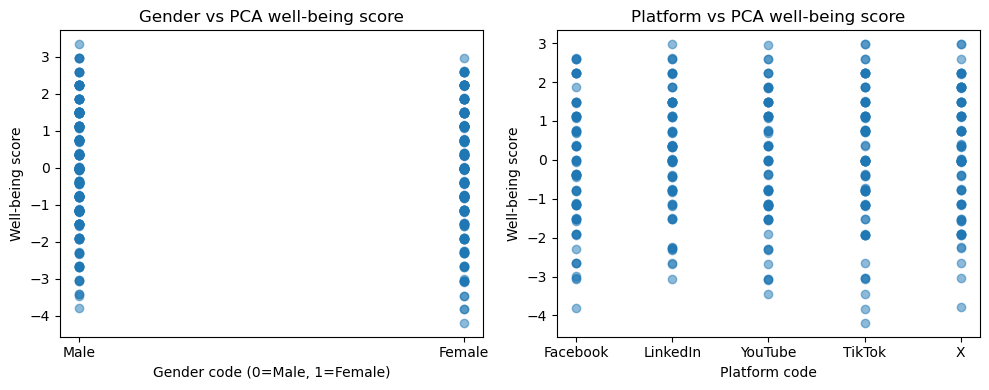

In [4]:

import numpy as np
import matplotlib.pyplot as plt

gender_map = {"Female": 1, "Male": 0}
df["Gender_code"] = df["Gender"].map(gender_map)

platform_map = {
    "Facebook": 0,
    "LinkedIn": 1,
    "Linkedln": 1,
    "YouTube": 2,
    "TikTok": 3,
    "X (Twitter)": 4,
    "X": 4
}
df["Platform_code"] = df["Social_Media_Platform"].map(platform_map)

# 1. Compute correlations with the PCA-based Wellbeing_Score
corr_gender = df["Gender_code"].corr(df["Wellbeing_Score"])
corr_platform = df["Platform_code"].corr(df["Wellbeing_Score"])

print("Correlation(Gender_code, Wellbeing_Score):", corr_gender)
print("Correlation(Platform_code, Wellbeing_Score):", corr_platform)

# 2. Visualize relationships using scatter plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#Plot 1: Gender vs Wellbeing_Score
axes[0].scatter(df["Gender_code"], df["Wellbeing_Score"], alpha=0.5)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Male", "Female"])
axes[0].set_xlabel("Gender code (0=Male, 1=Female)")
axes[0].set_ylabel("Well-being score")
axes[0].set_title("Gender vs PCA well-being score")

#Plot 2: Platform vs Wellbeing_Score
axes[1].scatter(df["Platform_code"], df["Wellbeing_Score"], alpha=0.5)
axes[1].set_xticks([0, 1, 2, 3, 4])
axes[1].set_xticklabels(["Facebook", "LinkedIn", "YouTube", "TikTok", "X"])
axes[1].set_xlabel("Platform code")
axes[1].set_ylabel("Well-being score")
axes[1].set_title("Platform vs PCA well-being score")

fig.tight_layout()
plt.show()

Ruanyiyang Sun:

1. The Naive Bayes model provides a reasonable baseline, but its misclassifications are concentrated in intermediate ranges (e.g., sleep 5–6, stress 6–7), reflecting its inability to capture nonlinear relationships among variables.
2. These error patterns indicate that the model is sensitive to borderline cases, and its performance is constrained by the independence assumption.

NAIVE BAYES MODEL DEVELOPMENT AND ERROR PATTERN ANALYSIS

1. DATA PREPARATION AND PREPROCESSING
----------------------------------------
Number of features: 8
Target variable distribution: High risk 62 (12.4%), Low risk 438 (87.6%)
Training set: 350 samples
Testing set: 150 samples
Training set class distribution: High risk 43 (12.3%), Low risk 307 (87.7%)
PERFORMANCE METRICS:
Accuracy:        0.8867
Precision:       0.5357
Recall:          0.7895
F1 Score:        0.6383

CONFUSION MATRIX:
              Predicted High  Predicted Low
Actual High             15               4
Actual Low              13             118

DETAILED METRICS:
True Positives (TP): 15 - Correctly predicted high risk
True Negatives (TN): 118 - Correctly predicted low risk
False Positives (FP): 13 - Incorrectly predicted as high risk
False Negatives (FN): 4 - Incorrectly predicted as low risk

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Low Risk       0.97      0.90      0.93

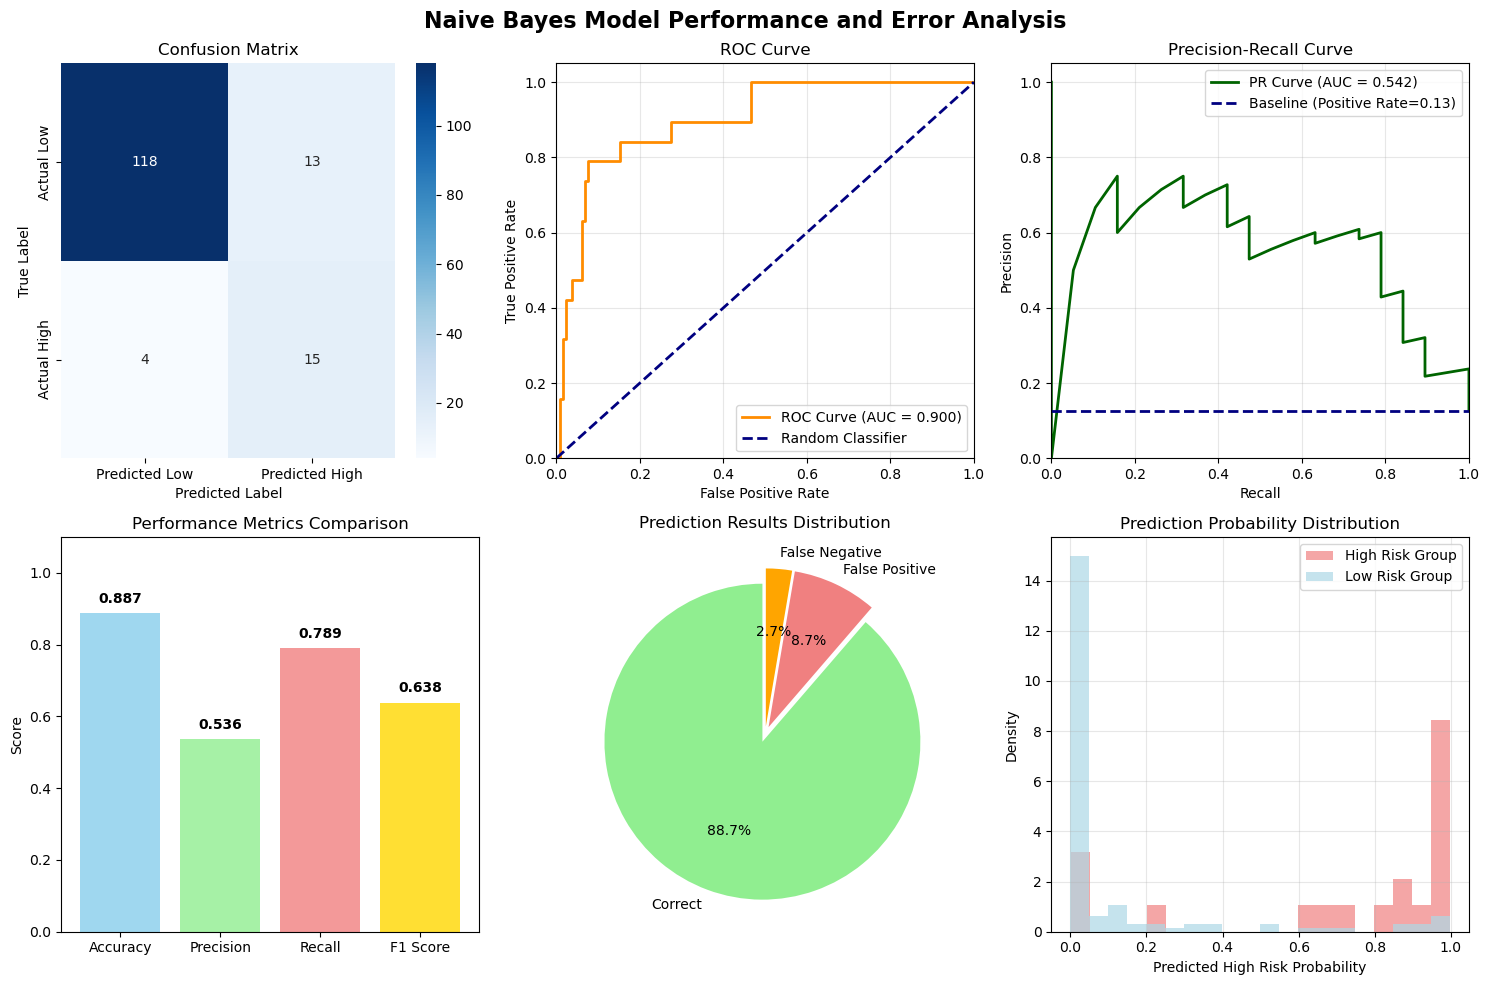


5. ERROR PATTERN DEEP ANALYSIS
----------------------------------------
ERROR ANALYSIS:
  Correct Predictions: 133 (88.7%)
  False Positives: 13 (8.7%)
  False Negatives: 4 (2.7%)

ERROR SAMPLE FEATURE ANALYSIS:

FALSE POSITIVE SAMPLES (Actually Low Risk but Predicted as High Risk):
  Sample Count: 13
  Daily_Screen_Time(hrs): Average = 1.31
  Stress_Level(1-10): Average = 1.25
  Sleep_Quality(1-10): Average = -1.16

FALSE NEGATIVE SAMPLES (Actually High Risk but Predicted as Low Risk):
  Sample Count: 4
  Daily_Screen_Time(hrs): Average = 0.03
  Stress_Level(1-10): Average = 0.09
  Sleep_Quality(1-10): Average = -0.69

6. NAIVE BAYES MODEL LIMITATIONS ANALYSIS
----------------------------------------

Naive Bayes Model Assumptions and Limitations:
1. Feature Independence Assumption:
   • Naive Bayes assumes all features are independent
   • In reality, screen time, sleep quality, and stress levels are often correlated
   • This may affect the model's ability to capture complex patter

In [5]:

# ===============================================================
#        Naive Bayes Model Development & Error Analysis
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report,
                           roc_curve, auc, precision_recall_curve)
print("="*60)
print("NAIVE BAYES MODEL DEVELOPMENT AND ERROR PATTERN ANALYSIS")
print("="*60)

# -------------------------- 1. Data Preparation and Preprocessing --------------------------
print("\n1. DATA PREPARATION AND PREPROCESSING")
print("-"*40)
df = pd.read_csv("Mental_Health_and_Social_Media_Balance_Dataset.csv")
df["mental_health_risk"] = (df["Happiness_Index(1-10)"] <= 6).astype(int)    # Create target variable
features = [
    "Age", "Gender", "Daily_Screen_Time(hrs)", "Sleep_Quality(1-10)",
    "Stress_Level(1-10)", "Days_Without_Social_Media", "Exercise_Frequency(week)",
    "Social_Media_Platform"
]     # Select features
X = df[features]
y = df["mental_health_risk"]
print(f"Number of features: {len(features)}")
print(f"Target variable distribution: High risk {y.sum()} ({y.sum()/len(y)*100:.1f}%), Low risk {len(y)-y.sum()} ({(len(y)-y.sum())/len(y)*100:.1f}%)")
# Encode categorical variables
for col in ["Gender", "Social_Media_Platform"]:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
# Standardize numerical features
scaler = StandardScaler()
numeric_cols = ["Age", "Daily_Screen_Time(hrs)", "Sleep_Quality(1-10)",
                "Stress_Level(1-10)", "Days_Without_Social_Media", "Exercise_Frequency(week)"]
numeric_cols = [col for col in numeric_cols if col in X.columns]
if numeric_cols:
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# -------------------------- 2. Train Naive Bayes Model --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
# Split into training and testing sets
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training set class distribution: High risk {y_train.sum()} ({y_train.sum()/len(y_train)*100:.1f}%), "
      f"Low risk {len(y_train)-y_train.sum()} ({(len(y_train)-y_train.sum())/len(y_train)*100:.1f}%)")
nb_model = GaussianNB()    # Create and train Naive Bayes model
nb_model.fit(X_train, y_train)

# -------------------------- 3. Model Performance Evaluation --------------------------
y_pred = nb_model.predict(X_test)    # Predictions
y_pred_proba = nb_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)    # Calculate performance metrics
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
print("PERFORMANCE METRICS:")
print(f"Accuracy:        {accuracy:.4f}")
print(f"Precision:       {precision:.4f}")
print(f"Recall:          {recall:.4f}")
print(f"F1 Score:        {f1:.4f}")
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"\nCONFUSION MATRIX:")
print(f"              Predicted High  Predicted Low")
print(f"Actual High   {tp:12d}    {fn:12d}")
print(f"Actual Low    {fp:12d}    {tn:12d}")
print(f"\nDETAILED METRICS:")
print(f"True Positives (TP): {tp} - Correctly predicted high risk")
print(f"True Negatives (TN): {tn} - Correctly predicted low risk")
print(f"False Positives (FP): {fp} - Incorrectly predicted as high risk")
print(f"False Negatives (FN): {fn} - Incorrectly predicted as low risk")
# Classification report
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=['Low Risk', 'High Risk']))

# -------------------------- 4. Model Visualization Analysis --------------------------
fig = plt.figure(figsize=(15, 10))   # Create visualization charts
fig.suptitle('Naive Bayes Model Performance and Error Analysis', fontsize=16, fontweight='bold')
ax1 = plt.subplot(2, 3, 1)    # 4.1 Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'], ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_ylabel('True Label')
ax1.set_xlabel('Predicted Label')
ax2 = plt.subplot(2, 3, 2)   # 4.2 ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)
ax3 = plt.subplot(2, 3, 3)   # 4.3 Precision-Recall curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall_vals, precision_vals)
ax3.plot(recall_vals, precision_vals, color='darkgreen', lw=2, label=f'PR Curve (AUC = {pr_auc:.3f})')
baseline = len(y_test[y_test==1]) / len(y_test)
ax3.axhline(y=baseline, color='navy', lw=2, linestyle='--', label=f'Baseline (Positive Rate={baseline:.2f})')
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('Recall')
ax3.set_ylabel('Precision')
ax3.set_title('Precision-Recall Curve')
ax3.legend(loc="upper right")
ax3.grid(True, alpha=0.3)
ax4 = plt.subplot(2, 3, 4)     # 4.4 Performance metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
bars = ax4.bar(metrics, values, color=colors, alpha=0.8)
ax4.set_ylabel('Score')
ax4.set_title('Performance Metrics Comparison')
ax4.set_ylim([0, 1.1])
for bar, value in zip(bars, values):     # Add value labels on bars
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
ax5 = plt.subplot(2, 3, 5)    # 4.5 Error type distribution
error_types = ['Correct', 'False Positive', 'False Negative']
error_counts = [tp+tn, fp, fn]
error_colors = ['lightgreen', 'lightcoral', 'orange']
ax5.pie(error_counts, labels=error_types, colors=error_colors, autopct='%1.1f%%',
        startangle=90, explode=(0.05, 0.05, 0.05))
ax5.set_title('Prediction Results Distribution')
ax6 = plt.subplot(2, 3, 6)    # 4.6 Prediction probability distribution
risk_probs = y_pred_proba[y_test == 1]    # Prediction probabilities for high-risk group
no_risk_probs = y_pred_proba[y_test == 0]
ax6.hist(risk_probs, bins=20, alpha=0.7, label='High Risk Group', color='lightcoral', density=True)    # Use compatible histogram plotting method
ax6.hist(no_risk_probs, bins=20, alpha=0.7, label='Low Risk Group', color='lightblue', density=True)
ax6.set_xlabel('Predicted High Risk Probability')
ax6.set_ylabel('Density')
ax6.set_title('Prediction Probability Distribution')
ax6.legend()
ax6.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------- 5. Error Pattern Analysis --------------------------
print("\n5. ERROR PATTERN DEEP ANALYSIS")
print("-"*40)
# Create error analysis dataset
test_results = pd.DataFrame(X_test, columns=X.columns)
test_results['Actual Label'] = y_test.values
test_results['Predicted Label'] = y_pred
test_results['Prediction Probability'] = y_pred_proba
test_results['Prediction Correct'] = (y_test.values == y_pred)
# Identify error types
test_results['Error Type'] = 'Correct'
test_results.loc[(test_results['Actual Label'] == 0) & (test_results['Predicted Label'] == 1), 'Error Type'] = 'False Positive'
test_results.loc[(test_results['Actual Label'] == 1) & (test_results['Predicted Label'] == 0), 'Error Type'] = 'False Negative'
print(f"ERROR ANALYSIS:")
print(f"  Correct Predictions: {len(test_results[test_results['Prediction Correct']])} ({len(test_results[test_results['Prediction Correct']])/len(test_results)*100:.1f}%)")
print(f"  False Positives: {len(test_results[test_results['Error Type']=='False Positive'])} ({len(test_results[test_results['Error Type']=='False Positive'])/len(test_results)*100:.1f}%)")
print(f"  False Negatives: {len(test_results[test_results['Error Type']=='False Negative'])} ({len(test_results[test_results['Error Type']=='False Negative'])/len(test_results)*100:.1f}%)")
# Analyze error sample features
print("\nERROR SAMPLE FEATURE ANALYSIS:")
# Analyze False Positive sample features
fp_samples = test_results[test_results['Error Type'] == 'False Positive']
if len(fp_samples) > 0:
    print("\nFALSE POSITIVE SAMPLES (Actually Low Risk but Predicted as High Risk):")
    print(f"  Sample Count: {len(fp_samples)}")
    # Analyze key features
    key_features_to_check = ['Daily_Screen_Time(hrs)', 'Stress_Level(1-10)', 'Sleep_Quality(1-10)']
    for feature in key_features_to_check:
        if feature in fp_samples.columns:
            avg_value = fp_samples[feature].mean()
            print(f"  {feature}: Average = {avg_value:.2f}")
# Analyze False Negative sample features
fn_samples = test_results[test_results['Error Type'] == 'False Negative']
if len(fn_samples) > 0:
    print("\nFALSE NEGATIVE SAMPLES (Actually High Risk but Predicted as Low Risk):")
    print(f"  Sample Count: {len(fn_samples)}")
    for feature in key_features_to_check:
        if feature in fn_samples.columns:
            avg_value = fn_samples[feature].mean()
            print(f"  {feature}: Average = {avg_value:.2f}")

# -------------------------- 6. Model Limitations Analysis --------------------------
print("\n6. NAIVE BAYES MODEL LIMITATIONS ANALYSIS")
print("-"*40)
print("\nNaive Bayes Model Assumptions and Limitations:")
print("="*60)
print("1. Feature Independence Assumption:")
print("   • Naive Bayes assumes all features are independent")
print("   • In reality, screen time, sleep quality, and stress levels are often correlated")
print("   • This may affect the model's ability to capture complex patterns")
print("\n2. Gaussian Distribution Assumption:")
print("   • Gaussian Naive Bayes assumes features follow normal distribution")
print("   • Real-world data may not meet this assumption")
print("   • May require feature transformation or other variants")
print("\n3. Specific Limitations in Mental Health Prediction:")
print("   • Mental health is a complex, multi-factor issue")
print("   • Single features may not be sufficient for accurate prediction")
print("   • Feature interactions are important but Naive Bayes may not capture them well")
print("\n4. Limitations Found from Error Analysis:")
print("   • False Positives: Model may overemphasize screen time, ignoring other factors")
print("   • False Negatives: Model may miss cases with moderate screen time but significant other risk factors")
print("   • May not accurately classify borderline cases")

# -------------------------- 7. Summary --------------------------
print("\n7. SUMMARY")
print("-"*40)
performance_results = {
    'Model': 'GaussianNaiveBayes',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1_Score': f1,
    'ROC_AUC': roc_auc,
    'PR_AUC': pr_auc,
    'True_Positives': int(tp),
    'True_Negatives': int(tn),
    'False_Positives': int(fp),
    'False_Negatives': int(fn),
    'Training_Samples': X_train.shape[0],
    'Testing_Samples': X_test.shape[0],
    'Feature_Count': X_train.shape[1]
}
performance_df = pd.DataFrame([performance_results])
print("\n" + "="*60)
print("NAIVE BAYES MODEL DEVELOPMENT AND ANALYSIS COMPLETED!")
print("="*60)
print("\nMAIN FINDINGS SUMMARY:")
print("-"*40)
print(f"1. Model Accuracy: {accuracy:.3f}")
print(f"2. Main Error Types:")
print(f"   • False Positives: {fp} cases (misclassified low risk as high risk)")
print(f"   • False Negatives: {fn} cases (misclassified high risk as low risk)")
print(f"3. Key Influencing Factors: Screen time, stress level, sleep quality")
print(f"4. Suggested Improvements: Consider feature correlations, add interaction terms")

Tianqi Yin:

Import functions

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Import dataset

In [7]:
df = pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')
df

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0
...,...,...,...,...,...,...,...,...,...,...
495,U496,23,Male,6.9,5.0,7.0,4.0,2.0,X (Twitter),10.0
496,U497,43,Female,5.6,7.0,6.0,5.0,2.0,Facebook,9.0
497,U498,41,Male,7.7,5.0,7.0,2.0,2.0,LinkedIn,8.0
498,U499,23,Male,4.2,9.0,7.0,0.0,2.0,Facebook,9.0


Clean dataset

In [8]:
df = df.dropna()
df = df.drop(columns = ['User_ID']) #user ID is not useful
df

,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0
...,...,...,...,...,...,...,...,...,...
495,23,Male,6.9,5.0,7.0,4.0,2.0,X (Twitter),10.0
496,43,Female,5.6,7.0,6.0,5.0,2.0,Facebook,9.0
497,41,Male,7.7,5.0,7.0,2.0,2.0,LinkedIn,8.0
498,23,Male,4.2,9.0,7.0,0.0,2.0,Facebook,9.0


In [9]:
target = 'Happiness_Index(1-10)' # Define happiness index as target variable

# Split data: X = features, y = target
X = df.drop(columns = [target]) 
y = df[target] 

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encode categorical variables if any exist
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, drop_first=True) # Convert categories to binary columns
    print(f"str_variable: {list(categorical_cols)}")
    print(f"num_variable: {X.shape[1]}")
# Split data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)# test_size=0.1: Use 10% of data for testing, random_state=42: Ensures reproducible splits
print(f"train: {X_train.shape}, test: {X_test.shape}")

# Standardize features to have mean=0 and variance=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit on train data and transform it
X_test_scaled = scaler.transform(X_test) # Transform test data using same scaling parameters

# Store original feature names for later reference
feature_names = X.columns.tolist()
feature_names

str_variable: ['Gender', 'Social_Media_Platform']
num_variable: 13
train: (450, 13), test: (50, 13)


['Age',
 'Daily_Screen_Time(hrs)',
 'Sleep_Quality(1-10)',
 'Stress_Level(1-10)',
 'Days_Without_Social_Media',
 'Exercise_Frequency(week)',
 'Gender_Male',
 'Gender_Other',
 'Social_Media_Platform_Instagram',
 'Social_Media_Platform_LinkedIn',
 'Social_Media_Platform_TikTok',
 'Social_Media_Platform_X (Twitter)',
 'Social_Media_Platform_YouTube']

Check standardization results

Training set after standardization

In [10]:
print(f"Mean: [{np.mean(X_train_scaled, axis=0).min():.4f}, {np.mean(X_train_scaled, axis=0).max():.4f}] (should be near 0)")
print(f"Std: [{np.std(X_train_scaled, axis=0).min():.4f}, {np.std(X_train_scaled, axis=0).max():.4f}] (should be near 1)")
print(f"Min: {np.min(X_train_scaled, axis=0).min():.4f}, Max: {np.max(X_train_scaled, axis=0).max():.4f}")

Mean: [-0.0000, 0.0000] (should be near 0)
Std: [1.0000, 1.0000] (should be near 1)
Min: -2.9638, Max: 4.6368


Test set after standardization

In [11]:
print(f"Mean: [{np.mean(X_test_scaled, axis=0).min():.4f}, {np.mean(X_test_scaled, axis=0).max():.4f}]")
print(f"Std: [{np.std(X_test_scaled, axis=0).min():.4f}, {np.std(X_test_scaled, axis=0).max():.4f}]")
print(f"Min: {np.min(X_test_scaled, axis=0).min():.4f}, Max: {np.max(X_test_scaled, axis=0).max():.4f}")

Mean: [-0.2505, 0.1968]
Std: [0.8664, 1.1524]
Min: -2.1553, Max: 4.6368


Test set statistics within acceptable ranges\
StandardScaler Validation: PASSED Test set statistics within acceptable ranges

Approach 1: Using LASSO for feature selection

In [12]:
# Create range of regularization strengths (alpha values)
alphas = np.logspace(-4, 2, 100) # 100 values from 10^-4 to 10^2 (logarithmic spacing)

# Track how coefficients change with different alpha values
coef_path = []
for alpha in alphas:
    # Train Lasso model with current alpha
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_train_scaled, y_train)
    coef_path.append(lasso.coef_) # Store coefficients for this alpha
coef_path = np.array(coef_path) # Convert to numpy array (100 alphas × n_features)

# Use cross-validation to find optimal alpha automatically
lasso_cv = LassoCV(alphas=np.logspace(-4, 2, 100), # Same alpha range to search
                   cv=5,  # 5-fold cross-validation
                   max_iter=10000,  # Ensure convergence
                   random_state=42)  # Reproducibility
lasso_cv.fit(X_train_scaled, y_train) # Train with CV to find best alpha

LassoCV(alphas=array([1.00000000e-04, 1.14975700e-04, 1.32194115e-04, 1.51991108e-04,
       1.74752840e-04, 2.00923300e-04, 2.31012970e-04, 2.65608778e-04,
       3.05385551e-04, 3.51119173e-04, 4.03701726e-04, 4.64158883e-04,
       5.33669923e-04, 6.13590727e-04, 7.05480231e-04, 8.11130831e-04,
       9.32603347e-04, 1.07226722e-03, 1.23284674e-03, 1.41747416e-03,
       1.62975083e-03, 1.87381742e-0...
       4.03701726e+00, 4.64158883e+00, 5.33669923e+00, 6.13590727e+00,
       7.05480231e+00, 8.11130831e+00, 9.32603347e+00, 1.07226722e+01,
       1.23284674e+01, 1.41747416e+01, 1.62975083e+01, 1.87381742e+01,
       2.15443469e+01, 2.47707636e+01, 2.84803587e+01, 3.27454916e+01,
       3.76493581e+01, 4.32876128e+01, 4.97702356e+01, 5.72236766e+01,
       6.57933225e+01, 7.56463328e+01, 8.69749003e+01, 1.00000000e+02]),
        cv=5, max_iter=10000, random_state=42)

Visualize: Qualitative judgment

Regularization Path

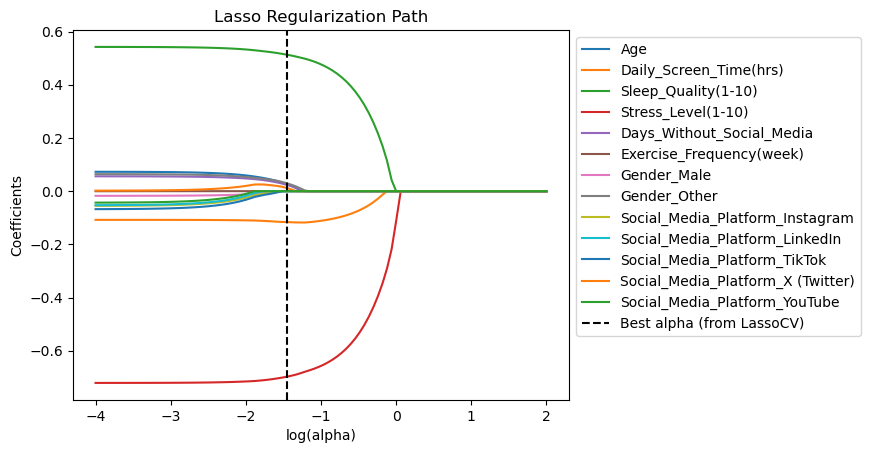

In [13]:
plt.figure
for i in range(coef_path.shape[1]):  # Loop over each feature (axis 1)
    plt.plot(np.log10(alphas), coef_path[:, i], label=feature_names[i])

# Plot a vertical line for the best alpha found by LassoCV
plt.axvline(np.log10(lasso_cv.alpha_), linestyle="--", color="k", label="Best alpha (from LassoCV)")
plt.xlabel('log(alpha)')
plt.ylabel('Coefficients')
plt.title('Lasso Regularization Path')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

Bar

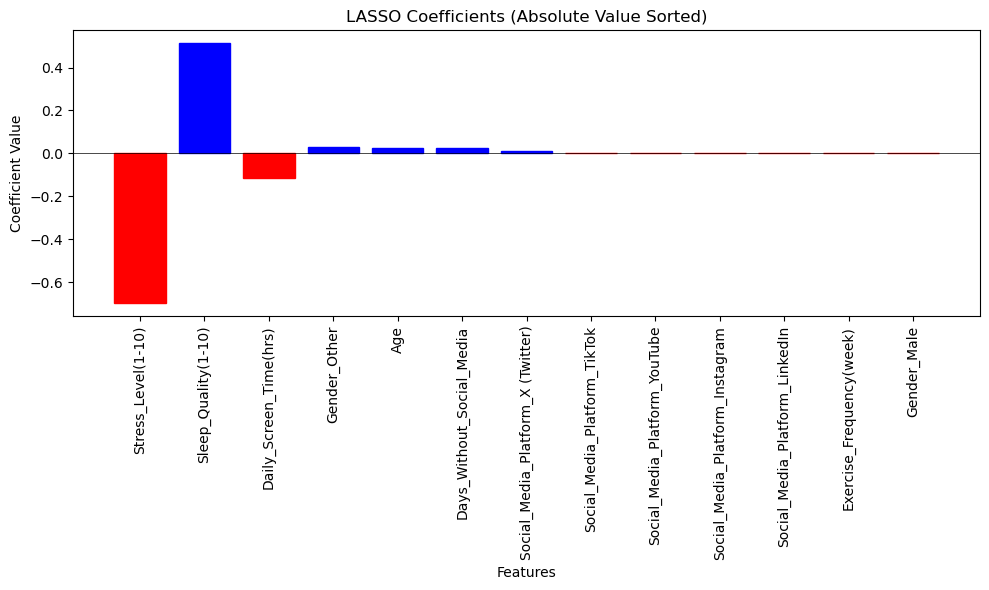

In [14]:
plt.figure(figsize=(10, 6))

# Sort features by absolute coefficient value (most to least important)
sorted_idx = np.argsort(np.abs(lasso_cv.coef_))[::-1]
sorted_features = [feature_names[i] for i in sorted_idx] 
sorted_coefs = lasso_cv.coef_[sorted_idx] # Corresponding coefficient values

bars = plt.bar(range(len(sorted_features)), sorted_coefs) # X positions: feature indices
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('LASSO Coefficients (Absolute Value Sorted)')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)

# Color bars based on coefficient sign
for i, bar in enumerate(bars):
    if sorted_coefs[i] > 0:
        bar.set_color('blue')
    else:
        bar.set_color('red')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

From these two figures, we can see that Stress_Level(1-10), Sleep_Quality(1-10), and Daily_Screen_Time(hrs) are three important features

Quantitative judgement

In [15]:
feature_sellect = {}
for i in range(len(feature_names)):
    feature_sellect[feature_names[i]] = lasso_cv.coef_[i]

good_feature = []
for key, value in feature_sellect.items():
    if abs(value) > 0.1:
        good_feature.append(key)
good_feature

['Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Stress_Level(1-10)']

Therefore, the three good fearture sellected by LASSO are Stress_Level(1-10), Sleep_Quality(1-10), and Daily_Screen_Time(hrs) 

Approach 2: Using LDA to sellect feature
- LDA needs clear class labels to work. It calculates "between-class" and "within-class" variance to find features that best separate groups. Continuous y values don't have defined groups, so we must create categories first.\
Since happiness score is ranging from 4 to 10, and according to psychology, <=60% is not feeling well, (from 4 to 7)/from (4 to 10) is approximately 60%, therefore, we consider score from 4 to 7 (score <= 7) is low.

In [16]:
def happiness_group(score):
    if score <= 7:
        return 'low'
    elif score <= 9:
        return 'medium'
    else:
        return 'high'
y_group = y.map(happiness_group)
y_group
y_train_lda, y_test_lda = train_test_split(y_group, test_size = 0.1, random_state = 42)
# Initialize and train Linear Discriminant Analysis (LDA) model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train_lda)

# Make predictions on test set
y_predict_lda = lda.predict(X_test_scaled) # Class predictions (discrete labels)
y_predict_proba_lda = lda.predict_proba(X_test_scaled) # Probability predictions for each class

# Calculate and display model accuracy
accuracy = accuracy_score(y_test_lda, y_predict_lda)# Compare predicted vs actual labels 
print(f"accuracy: {accuracy:.3f}")

# Generate detailed classification report
classes = classification_report(y_test_lda, y_predict_lda, zero_division = 0) # classification_report provides precision, recall, f1-score for each class, zero_division=0 handles cases where no positive predictions are made for a class
print(classes)
# Create DataFrame to display LDA discriminant function coefficients
coef_df = pd.DataFrame(
    lda.coef_, # Coefficient matrix from LDA (shape: n_classes-1 × n_features)
    index=[f"function{i+1}" for i in range(lda.coef_.shape[0])],
    columns=X.columns
)
print(coef_df.round(3))
print(lda.intercept_.round(3))

accuracy: 0.740
              precision    recall  f1-score   support

        high       0.83      0.83      0.83        12
         low       0.83      0.59      0.69        17
      medium       0.65      0.81      0.72        21

    accuracy                           0.74        50
   macro avg       0.77      0.74      0.75        50
weighted avg       0.76      0.74      0.74        50

             Age  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
function1  0.077                  -0.030                1.233   
function2 -0.179                   0.126               -1.232   
function3  0.057                  -0.059               -0.201   

           Stress_Level(1-10)  Days_Without_Social_Media  \
function1              -1.657                      0.169   
function2               1.595                     -0.156   
function3               0.311                     -0.036   

           Exercise_Frequency(week)  Gender_Male  Gender_Other  \
function1                     0.128

Visualize

Training set: 450 points
Test set: 50 points


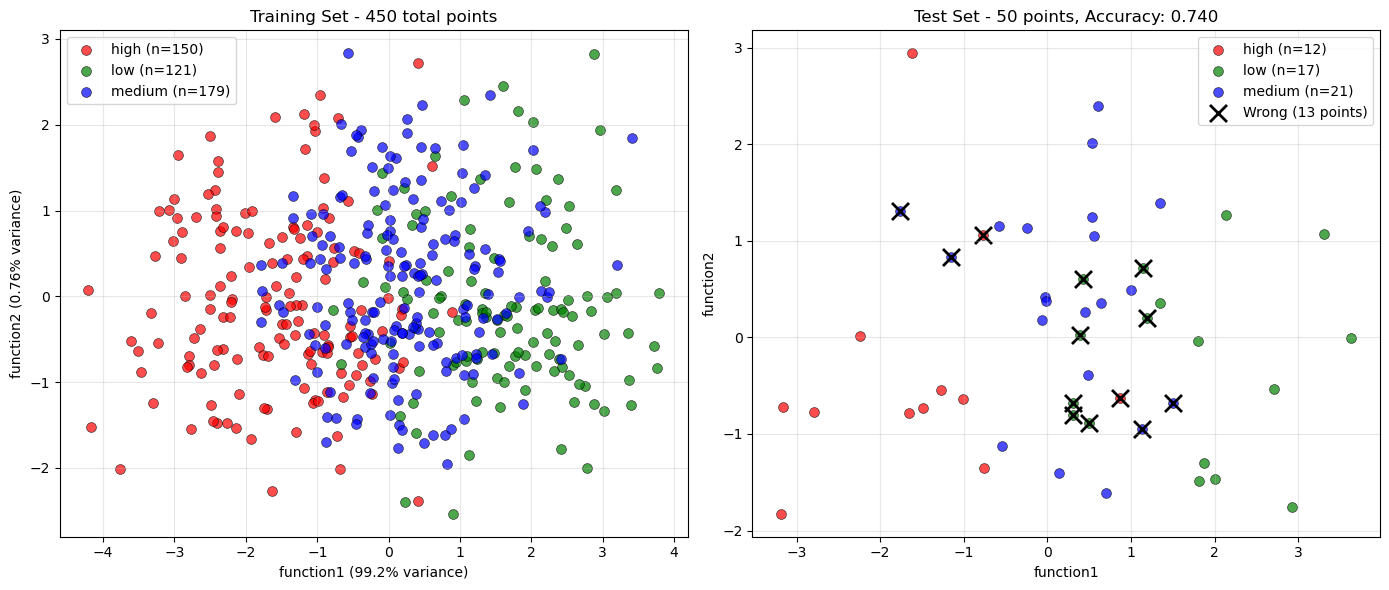


=== Detailed Test Set Analysis ===
Total test points: 50
Accuracy: 0.740
Number wrong: 13
Number correct: 37


In [17]:
# Calculate LDA projections
X_train_lda = lda.transform(X_train_scaled)
X_test_lda = lda.transform(X_test_scaled)

print(f"Training set: {len(X_train_lda)} points")
print(f"Test set: {len(X_test_lda)} points")

categories = np.unique(y_train_lda)
colors = ['red', 'green', 'blue']

plt.figure(figsize=(14, 6))

# Subplot 1: Training set with class counts
plt.subplot(1, 2, 1)
for i, category in enumerate(categories):
    mask = y_train_lda == category
    count = np.sum(mask)
    plt.scatter(X_train_lda[mask, 0], X_train_lda[mask, 1], 
               c=colors[i], label=f'{category} (n={count})', 
               alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
    
plt.xlabel('function1 (99.2% variance)')
plt.ylabel('function2 (0.76% variance)')
plt.title(f'Training Set - {len(X_train_lda)} total points')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Test set with accuracy breakdown
plt.subplot(1, 2, 2)

# Calculate class-wise counts
class_counts = {}
for category in categories:
    mask = y_test_lda == category
    class_counts[category] = np.sum(mask)
    plt.scatter(X_test_lda[mask, 0], X_test_lda[mask, 1], 
               c=colors[np.where(categories == category)[0][0]], 
               label=f'{category} (n={np.sum(mask)})',
               alpha=0.7, s=50, edgecolors='black', linewidth=0.5)

# Highlight wrong predictions
wrong_predictions = y_predict_lda != y_test_lda
wrong_count = np.sum(wrong_predictions)
if wrong_count > 0:
    plt.scatter(X_test_lda[wrong_predictions, 0], 
               X_test_lda[wrong_predictions, 1],
               c='black', marker='x', s=150, 
               label=f'Wrong ({wrong_count} points)', 
               linewidth=2, alpha=1.0)

plt.xlabel('function1')
plt.ylabel('function2')
plt.title(f'Test Set - {len(X_test_lda)} points, Accuracy: {accuracy:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis
print("\n=== Detailed Test Set Analysis ===")
print(f"Total test points: {len(X_test_lda)}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Number wrong: {wrong_count}")
print(f"Number correct: {len(X_test_lda) - wrong_count}")

Plotting SVM Decision Boundaries on LDA-Projected Data

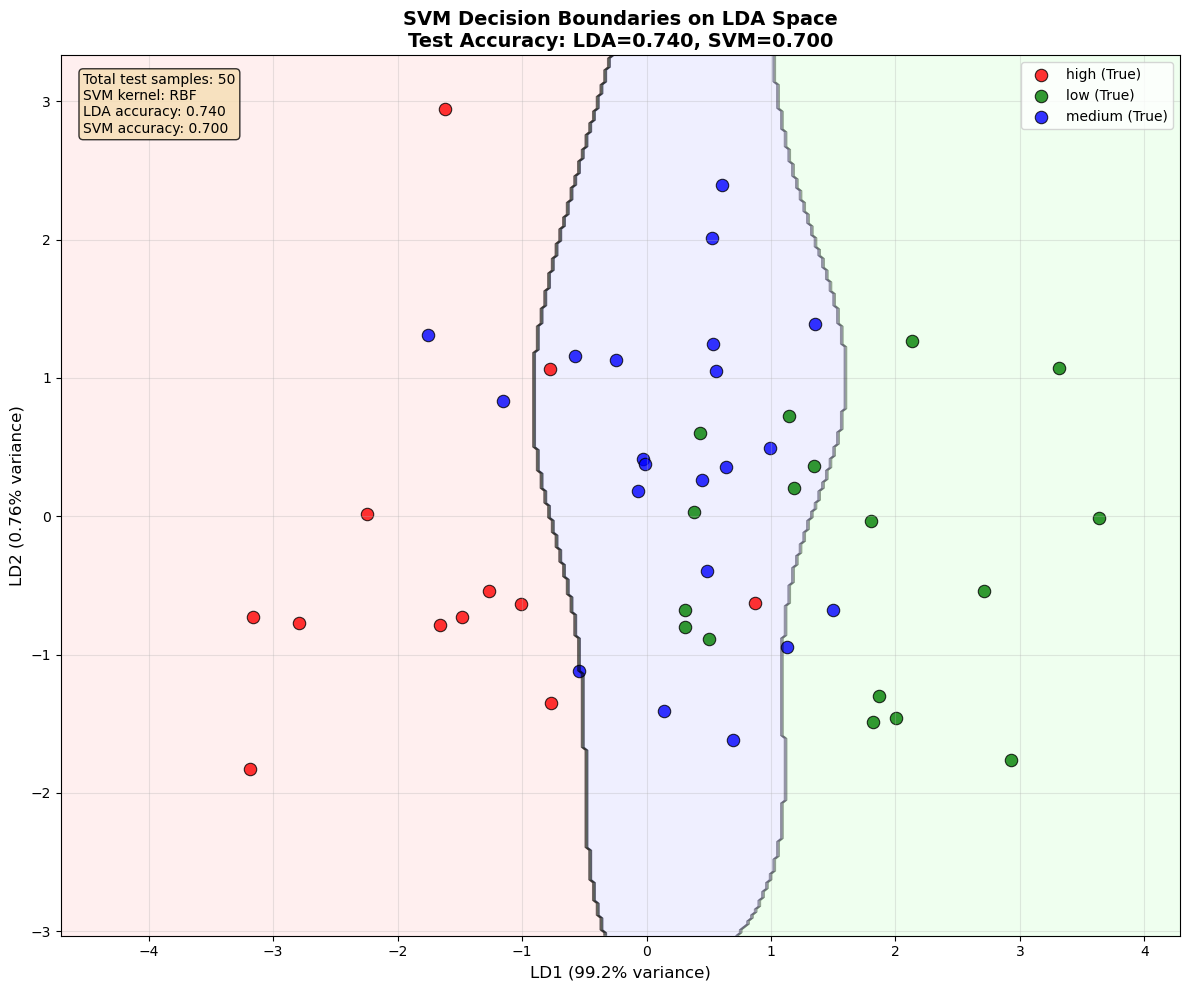

=== Model Performance Summary ===
LDA Classification Accuracy: 0.740
SVM on LDA space Accuracy: 0.700
Improvement: -0.040


In [18]:
# 1. Prepare data (use LDA-projected 2D data)
# X_train_lda, X_test_lda are already computed from LDA
# y_train_lda, y_test_lda are your categorical labels

# 2. Convert string labels to numeric for SVM
le = LabelEncoder()
y_train_numeric = le.fit_transform(y_train_lda)
y_test_numeric = le.transform(y_test_lda)

# 3. Train SVM with RBF kernel on LDA space
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_lda, y_train_numeric)

# 4. Create mesh grid for decision boundary visualization
x_min, x_max = X_train_lda[:, 0].min() - 0.5, X_train_lda[:, 0].max() + 0.5
y_min, y_max = X_train_lda[:, 1].min() - 0.5, X_train_lda[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# 5. Predict on mesh grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 6. Plot decision boundaries
plt.figure(figsize=(12, 10))

# Background: decision regions
cmap_background = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

# Decision boundaries (contours)
plt.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)

# 7. Plot test data points with true labels
colors = ['red', 'green', 'blue']
for i in range(3):  # 3 classes
    mask = y_test_numeric == i
    plt.scatter(X_test_lda[mask, 0], X_test_lda[mask, 1],
               c=colors[i], marker='o', s=80,
               edgecolors='black', linewidth=0.8,
               label=f'{le.inverse_transform([i])[0]} (True)',
               alpha=0.8)

# 8. Calculate and display accuracy
y_test_pred_svm = svm.predict(X_test_lda)
svm_accuracy = np.mean(y_test_pred_svm == y_test_numeric)

plt.xlabel('LD1 (99.2% variance)', fontsize=12)
plt.ylabel('LD2 (0.76% variance)', fontsize=12)
plt.title(f'SVM Decision Boundaries on LDA Space\nTest Accuracy: LDA={accuracy:.3f}, SVM={svm_accuracy:.3f}', 
          fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

# 9. Add informative text box
textstr = '\n'.join((
    f'Total test samples: {len(y_test_lda)}',
    f'SVM kernel: RBF',
    f'LDA accuracy: {accuracy:.3f}',
    f'SVM accuracy: {svm_accuracy:.3f}'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# 10. Print comparison summary
print("=== Model Performance Summary ===")
print(f"LDA Classification Accuracy: {accuracy:.3f}")
print(f"SVM on LDA space Accuracy: {svm_accuracy:.3f}")
print(f"Improvement: {svm_accuracy - accuracy:+.3f}")

SVM Probability Contours on LDA Space

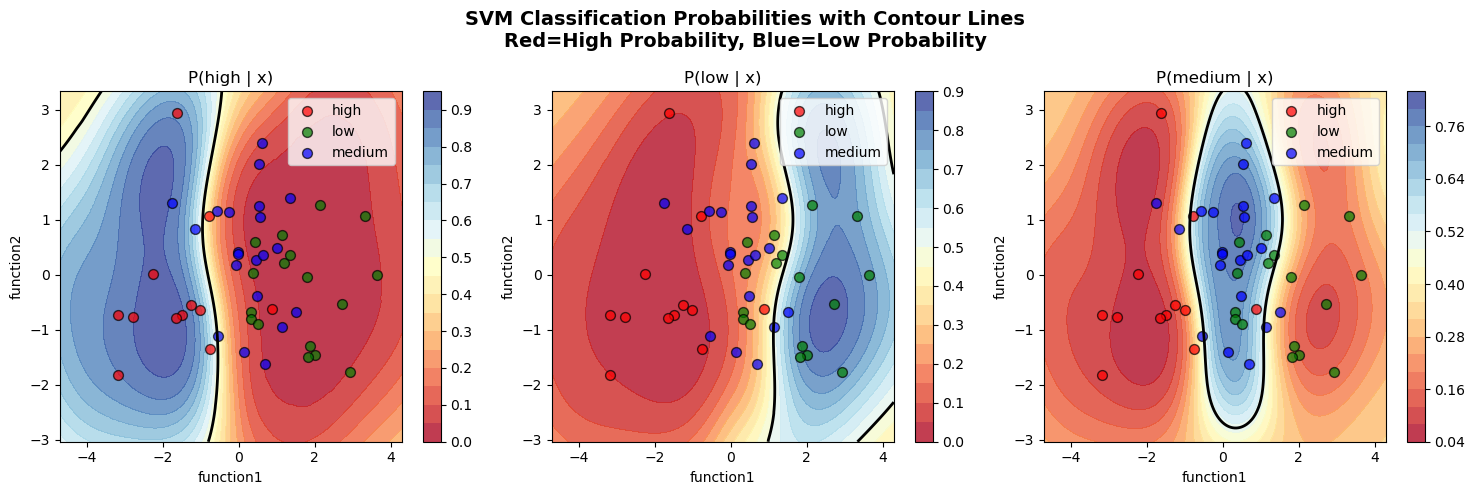

In [19]:
# Prepare data - convert string labels to numeric
le = LabelEncoder()
y_train_numeric = le.fit_transform(y_train_lda)
y_test_numeric = le.transform(y_test_lda)

# Train SVM with probability estimates
svm_prob = SVC(kernel='rbf', C=1.0, gamma='scale', 
               probability=True, random_state=42)
svm_prob.fit(X_train_lda, y_train_numeric)

# Create grid for visualization
x_min, x_max = X_train_lda[:, 0].min() - 0.5, X_train_lda[:, 0].max() + 0.5
y_min, y_max = X_train_lda[:, 1].min() - 0.5, X_train_lda[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Get probability predictions over the grid
Z_proba = svm_prob.predict_proba(np.c_[xx.ravel(), yy.ravel()])

# Plot contour maps
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

categories = le.classes_  # Should be ['high', 'low', 'medium'] or similar

for i, (ax, category) in enumerate(zip(axes, categories)):
    # Probability for current class
    Z_i = Z_proba[:, i].reshape(xx.shape)
    
    # Plot probability contours
    contour = ax.contourf(xx, yy, Z_i, levels=20, cmap='RdYlBu', alpha=0.8)
    
    # Plot test data points
    colors = ['red', 'green', 'blue']
    for j in range(3):
        mask = y_test_numeric == j
        ax.scatter(X_test_lda[mask, 0], X_test_lda[mask, 1],
                  c=colors[j], edgecolors='black', s=50, alpha=0.7,
                  label=f'{le.inverse_transform([j])[0]}')
    
    # Add decision boundary (probability = 0.5)
    cs = ax.contour(xx, yy, Z_i, levels=[0.5], colors='black', linewidths=2)
    
    ax.set_xlabel('function1')
    ax.set_ylabel('function2')
    ax.set_title(f'P({category} | x)')
    ax.legend(loc='upper right')
    plt.colorbar(contour, ax=ax)

plt.suptitle('SVM Classification Probabilities with Contour Lines\nRed=High Probability, Blue=Low Probability', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

How much these functions contribute to predicting

In [20]:
coef_rank = np.linalg.matrix_rank(lda.coef_)
print(f"Coefficient matrix rank: {coef_rank}")

if hasattr(lda, 'explained_variance_ratio_'):
    print(f"Explained variance ratio: {lda.explained_variance_ratio_}")

X_cov = np.cov(X_train_scaled.T)
print(f"Feature covariance matrix rank: {np.linalg.matrix_rank(X_cov)}")

print(f"Number of classes: {len(lda.classes_)}")

Coefficient matrix rank: 2
Explained variance ratio: [0.9923695 0.0076305]
Feature covariance matrix rank: 13
Number of classes: 3


Explained variance: [0.9923695 0.0076305]\
function 1: ～99.2% contribution (dominant)\
function 2: ～0.7% contribution (negligible)\
function 3: Redundant (zero contribution, linear combination of f1 & f2)

Visualize in one dimention

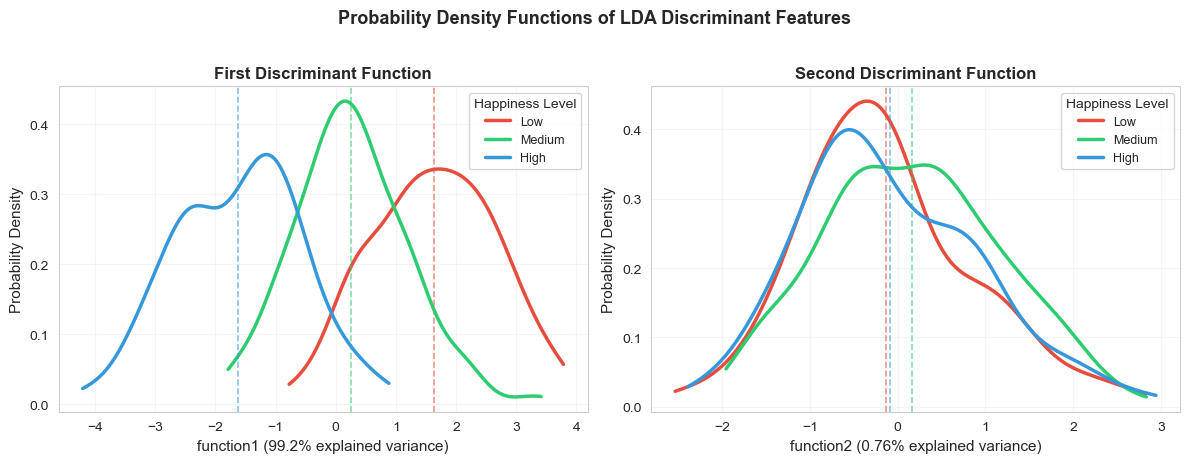

In [21]:
from scipy import stats

# Set academic style
plt.style.use('default')
sns.set_style("whitegrid")

# Combine data for visualization
X_lda_combined = np.vstack([X_train_lda, X_test_lda])
y_combined = np.concatenate([y_train_lda, y_test_lda])

# Create DataFrame
lda_df = pd.DataFrame({
    'LD1': X_lda_combined[:, 0],
    'LD2': X_lda_combined[:, 1] if X_lda_combined.shape[1] > 1 else np.zeros(len(X_lda_combined)),
    'Happiness': y_combined
})

# Professional color palette (ColorBrewer Set1)
colors = ['#E74C3C', '#2ECC71', '#3498DB']  # Red, Green, Blue
categories = ['low', 'medium', 'high']

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))

# Subplot 1: function1 Distribution
ax1 = axes[0]
for i, category in enumerate(categories):
    data = lda_df[lda_df['Happiness'] == category]['LD1'].dropna()
    if len(data) > 1:
        # Gaussian Kernel Density Estimation
        kde = stats.gaussian_kde(data, bw_method='scott')
        x_range = np.linspace(data.min(), data.max(), 200)
        density = kde(x_range)
        
        ax1.plot(x_range, density, color=colors[i], linewidth=2.5, 
                label=category.capitalize())
        
        # Add mean line
        mean_val = data.mean()
        ax1.axvline(x=mean_val, color=colors[i], linestyle='--', 
                   alpha=0.6, linewidth=1.2)

ax1.set_xlabel('function1 (99.2% explained variance)', fontsize=11)
ax1.set_ylabel('Probability Density', fontsize=11)
ax1.set_title('First Discriminant Function', fontsize=12, fontweight='bold')
ax1.legend(title='Happiness Level', fontsize=9)
ax1.grid(True, alpha=0.2)

# Subplot 2: function2 Distribution
ax2 = axes[1]
for i, category in enumerate(categories):
    data = lda_df[lda_df['Happiness'] == category]['LD2'].dropna()
    if len(data) > 1:
        kde = stats.gaussian_kde(data, bw_method='scott')
        x_range = np.linspace(data.min(), data.max(), 200)
        density = kde(x_range)
        
        ax2.plot(x_range, density, color=colors[i], linewidth=2.5, 
                label=category.capitalize())
        
        mean_val = data.mean()
        ax2.axvline(x=mean_val, color=colors[i], linestyle='--', 
                   alpha=0.6, linewidth=1.2)

ax2.set_xlabel('function2 (0.76% explained variance)', fontsize=11)
ax2.set_ylabel('Probability Density', fontsize=11)
ax2.set_title('Second Discriminant Function', fontsize=12, fontweight='bold')
ax2.legend(title='Happiness Level', fontsize=9)
ax2.grid(True, alpha=0.2)

# Main title
plt.suptitle('Probability Density Functions of LDA Discriminant Features', 
             fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()

plt.show()

Therefore, function1 is much more important than function2

In [22]:
# get the absolute value of the coefficient of function1
first_coef = np.abs(lda.coef_[0])

# use rank() function
importance_df = pd.DataFrame({
    'feature': X.columns,
    'abs_coefficient': first_coef,
    'importance_rank': pd.Series(-first_coef).rank(method='min').astype(int)
}).sort_values('abs_coefficient', ascending=False)

print(importance_df.to_string(index=False))
print()

                          feature  abs_coefficient  importance_rank
               Stress_Level(1-10)         1.657384                1
              Sleep_Quality(1-10)         1.233452                2
                      Gender_Male         0.202771                3
        Days_Without_Social_Media         0.168839                4
Social_Media_Platform_X (Twitter)         0.168785                5
   Social_Media_Platform_LinkedIn         0.156372                6
         Exercise_Frequency(week)         0.128169                7
                              Age         0.076524                8
  Social_Media_Platform_Instagram         0.070570                9
                     Gender_Other         0.036732               10
           Daily_Screen_Time(hrs)         0.030451               11
     Social_Media_Platform_TikTok         0.008095               12
    Social_Media_Platform_YouTube         0.003815               13



By using LDA, the most important features are Stress_Level(1-10) and Sleep_Quality(1-10), which overlap with Lasso 

Boxplot Visualization: Stress Level & Sleep Quality vs Happiness Index

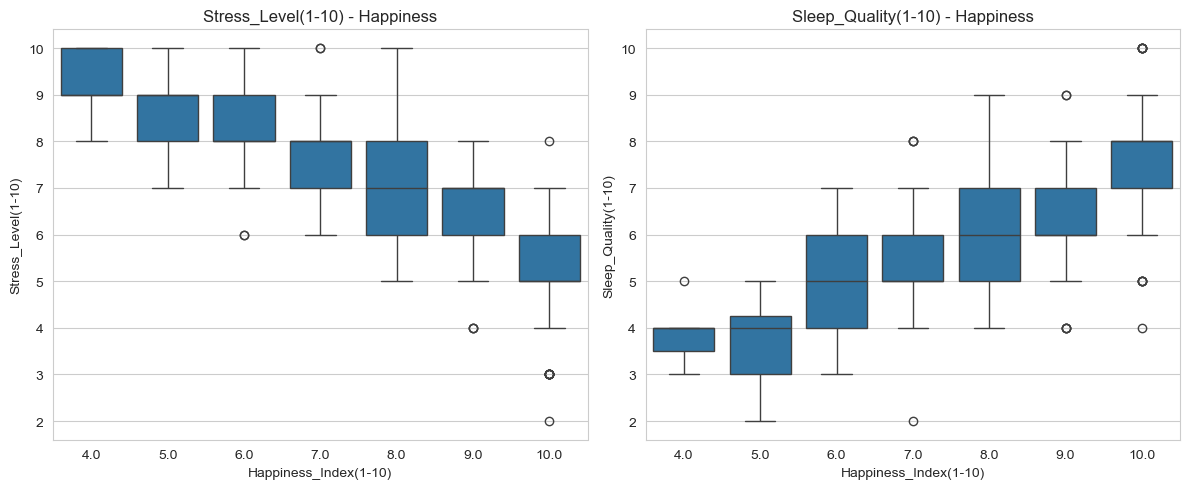

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
for i, col in enumerate(['Stress_Level(1-10)', 'Sleep_Quality(1-10)']):
    sns.boxplot(x='Happiness_Index(1-10)', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} - Happiness')
plt.tight_layout()
plt.show()

## 5 Conclusions

The combined LASSO and logistic‐regression analyses indicate that a small set of lifestyle variables—particularly screen time and exercise frequency—provides measurable but limited predictive power for wellbeing and binary mental-health status. While L1 regularization helps isolate the most influential predictors and the derived decision boundary offers an interpretable behavioural threshold, overall model performance remains moderate, constrained by linearity and sparse feature design. Future work should incorporate richer behavioural features and more flexible nonlinear models to capture the multidimensional structure of wellbeing more effectively.

In this project, we used the Mental Health and Social Media Balance dataset to build an interpretable pipeline that links digital behavior to college students’ well-being. Using PCA, we created latent **Wellbeing_Score** and **Lifestyle_Score** measures that summarize multiple survey items into psychologically meaningful dimensions. These scores revealed a clear positive relationship between healthier lifestyles and better well-being.

Through **Project 1**, we showed that Lasso and logistic regression can identify **daily screen time** as the dominant behavioral correlate of well-being and can provide an empirically grounded threshold of roughly **5–6 hours per day**, beyond which the likelihood of being in a good-status group declines. **Project 2** demonstrated that relatively simple classifiers, such as Gaussian Naive Bayes, can reliably detect high-risk students and improve substantially over a majority baseline, especially in terms of recall for the high-risk group. **Project 3** further highlighted the importance of stress, sleep quality, and screen time by showing that these three variables alone allow LDA to separate low-, medium-, and high-happiness groups with about 70% accuracy.

Taken together, our findings point to a nuanced view of social media and mental health. The key message is not that students should completely abandon social media, but that **very high daily screen time, combined with poor sleep and high stress, is associated with markedly worse outcomes**. For universities, this suggests that practical interventions might focus on helping students keep daily social-media use below very high levels, improving sleep hygiene, and monitoring stress, rather than enforcing unrealistic zero-use policies. Methodologically, our work illustrates how traditional statistical models and basic machine-learning tools can be combined to produce results that are both predictive and interpretable, providing a useful bridge between computational methods and social-science questions about how young people live and experience their lives online.

Yifei Pan:

LASSO regression to predict the PCA-based Wellbeing_Score
from three lifestyle variables:
  - Daily_Screen_Time(hrs)
  - Days_Without_Social_Media
  - Exercise_Frequency(week)
Steps:
1. Split data into training and test sets.
2. Standardize predictors.
3. Fit a LASSO model and inspect MSE, R², and coefficients.
4. Visualize true vs predicted scores.
5. Plot fitted relationships for screen time and exercise.

MSE: 0.6161589391775455
R^2: 0.7279087974961298
Best lambda (alpha): 0.1
Intercept: -0.007300674706499041
Coefficients:
Daily_Screen_Time(hrs): -1.1671
Days_Without_Social_Media: 0.0000
Exercise_Frequency(week): -0.0048


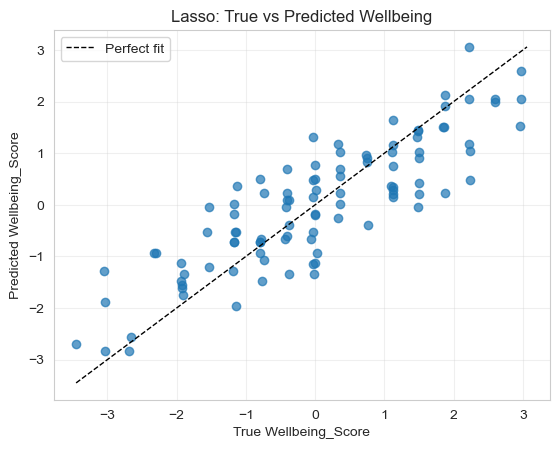

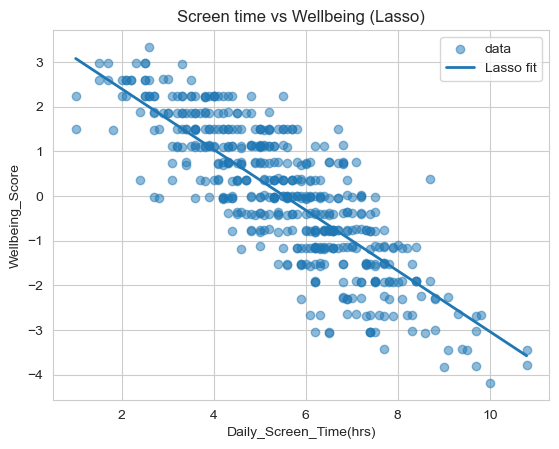

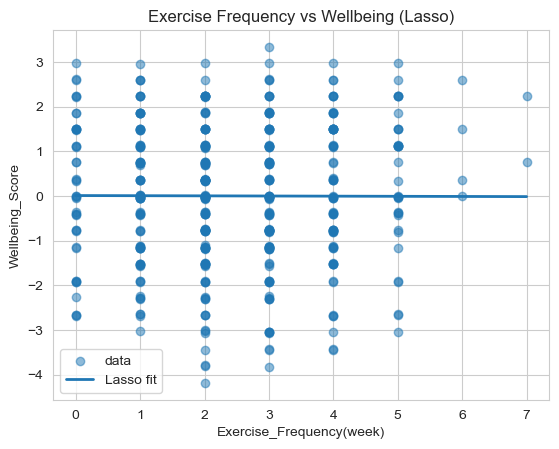

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df=pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')

# 1. Construct a PCA-based well-being score
# (Sleep quality ↑, Stress ↓, Happiness ↑)

# Select outcome variables related to well-being
Y_cols = ["Sleep_Quality(1-10)", "Stress_Level(1-10)", "Happiness_Index(1-10)"]
Y = df.loc[:, Y_cols].copy()

# Flip the sign of stress so that higher values always mean "better"
Y["Stress_Level(1-10)"] = -Y["Stress_Level(1-10)"]

# Standardize well-being variables (mean = 0, std = 1)
scaler_Y = StandardScaler()
Y_z = scaler_Y.fit_transform(Y)

# Apply PCA and keep only the first principal component
pca_Y = PCA(n_components=1)
Y_pc1 = pca_Y.fit_transform(Y_z)

# Store the first principal component as a composite well-being score
df["Wellbeing_Score"] = Y_pc1[:, 0]


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Select predictor matrix X and response vector y
X = df.loc[:, ["Daily_Screen_Time(hrs)",
               "Days_Without_Social_Media",
               "Exercise_Frequency(week)"]]
y = df.loc[:, "Wellbeing_Score"]

# 1. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Standardize predictors (important for L1 regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Fit LASSO model and evaluate performance
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Predict Wellbeing_Score for the test set
y_pred = lasso.predict(X_test_scaled)

# Compute evaluation metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

# Report model parameters
print("Best lambda (alpha):", lasso.alpha)
print("Intercept:", lasso.intercept_)
print("Coefficients:")
for name, coef in zip(X.columns, lasso.coef_):
    print(f"{name}: {coef:.4f}")


# 4. Plot true vs predicted Wellbeing_Score for the test set
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("True Wellbeing_Score")
plt.ylabel("Predicted Wellbeing_Score")
plt.title("Lasso: True vs Predicted Wellbeing")
# 45-degree reference line (perfect predictions)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 
         color='black', linestyle='--', linewidth=1, label='Perfect fit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# 5a. Partial effect plot for Daily_Screen_Time(hrs)

x_name = "Daily_Screen_Time(hrs)"

plt.figure()
plt.scatter(df[x_name], df["Wellbeing_Score"],
            alpha=0.5, label="data")

# Create a grid of screen-time values across the observed range
x_grid = np.linspace(df[x_name].min(), df[x_name].max(), 100)

# Hold the other two predictors at their sample means
mean_days = df["Days_Without_Social_Media"].mean()
mean_exer = df["Exercise_Frequency(week)"].mean()

# Construct a design matrix for prediction
X_grid = pd.DataFrame({
    "Daily_Screen_Time(hrs)": x_grid,
    "Days_Without_Social_Media": mean_days,
    "Exercise_Frequency(week)": mean_exer
})

# Apply the same scaling and get predicted Wellbeing_Score
X_grid_scaled = scaler.transform(X_grid)
y_grid_pred = lasso.predict(X_grid_scaled)

# Plot fitted LASSO line on top of the scatter plot
plt.plot(x_grid, y_grid_pred, linewidth=2, label="Lasso fit")
plt.xlabel("Daily_Screen_Time(hrs)")
plt.ylabel("Wellbeing_Score")
plt.title("Screen time vs Wellbeing (Lasso)")
plt.legend()
plt.show()

# 5b. Partial effect plot for Exercise_Frequency(week)

z_name = "Exercise_Frequency(week)"

plt.figure()
plt.scatter(df[z_name], df["Wellbeing_Score"],
            alpha=0.5, label="data")

# Grid over the range of exercise frequency
z_grid = np.linspace(df[z_name].min(), df[z_name].max(), 100)

# Hold screen time and days-without-social-media at their means
mean_days = df["Days_Without_Social_Media"].mean()
mean_time = df["Daily_Screen_Time(hrs)"].mean()

Z_grid = pd.DataFrame({
    "Daily_Screen_Time(hrs)": mean_time,
    "Days_Without_Social_Media": mean_days,
    "Exercise_Frequency(week)": z_grid
})

# Scale and predict over this grid
Z_grid_scaled = scaler.transform(Z_grid)
y_grid_pred = lasso.predict(Z_grid_scaled)

# Plot fitted curve
plt.plot(z_grid, y_grid_pred, linewidth=2, label="Lasso fit")
plt.xlabel("Exercise_Frequency(week)")
plt.ylabel("Wellbeing_Score")
plt.title("Exercise Frequency vs Wellbeing (Lasso)")
plt.legend()
plt.show()

Yifei Pan:

Logistic regression pipeline to predict a binary
Good_status label from three lifestyle variables:
  - Daily_Screen_Time(hrs)
  - Days_Without_Social_Media
  - Exercise_Frequency(week)
Steps:
1. Use cross-validation to compare different L2 strengths (C).
2. Construct a binary Good_status label from Wellbeing_Score.
3. Split the data into train and test sets and standardize X.
4. Use L1 logistic regression for feature selection.
5. Refit an L2 logistic regression on selected features.
6. Evaluate classification performance and compute the
    decision boundary in terms of screen time.

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df=pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')

# 1. Construct a PCA-based well-being score
# (Sleep quality ↑, Stress ↓, Happiness ↑)

# Select outcome variables related to well-being
Y_cols = ["Sleep_Quality(1-10)", "Stress_Level(1-10)", "Happiness_Index(1-10)"]
Y = df.loc[:, Y_cols].copy()

# Flip the sign of stress so that higher values always mean "better"
Y["Stress_Level(1-10)"] = -Y["Stress_Level(1-10)"]

# Standardize well-being variables (mean = 0, std = 1)
scaler_Y = StandardScaler()
Y_z = scaler_Y.fit_transform(Y)

# Apply PCA and keep only the first principal component
pca_Y = PCA(n_components=1)
Y_pc1 = pca_Y.fit_transform(Y_z)

# Store the first principal component as a composite well-being score
df["Wellbeing_Score"] = Y_pc1[:, 0]


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Feature names used in the logistic regression models
feature_cols = [
    "Daily_Screen_Time(hrs)",
    "Days_Without_Social_Media",
    "Exercise_Frequency(week)"
]

# 1. Cross-validation to choose a reasonable L2 regularization strength C
# Use the original Wellbeing_Score as a temporary target

target_col = "Wellbeing_Score"
y_tmp = df[target_col]
X_tmp = df[feature_cols]

# Standardize predictors for logistic regression
scaler_tmp = StandardScaler()
X_tmp_scaled = scaler_tmp.fit_transform(X_tmp)

Cs = [0.01, 0.1, 0.5, 1.0]
for C in Cs:
    model = LogisticRegression(
        penalty="l2",
        C=C,
        max_iter=2000,
        random_state=42
    )
    scores = cross_val_score(
        model,
        X_tmp_scaled,
        (y_tmp >= y_tmp.median()).astype(int),  # temporary binary label
        cv=5,
        scoring="accuracy"
    )
    print(f"C={C}, mean CV accuracy={scores.mean():.3f}")

# 2. Construct the final binary target: Good_status

# Here we define Good_status using the median of Wellbeing_Score
median_wellbeing = df["Wellbeing_Score"].median()
df["Good_status"] = (df["Wellbeing_Score"] >= median_wellbeing).astype(int)

target_col = "Good_status"

X = df[feature_cols]
y = df[target_col]

# 3. Train–test split and standardization

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keep the proportion of Good_status in both sets
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. L1 logistic regression for feature selection

log_reg_l1 = LogisticRegression(
    penalty="l1",
    C=0.1,
    solver="liblinear",  # liblinear supports L1 penalty
    max_iter=2000,
    random_state=42
)
log_reg_l1.fit(X_train_scaled, y_train)

# Extract L1 coefficients and select non-zero features
coef_l1 = log_reg_l1.coef_[0]
mask = np.abs(coef_l1) > 1e-6
selected_features = [f for f, m in zip(feature_cols, mask) if m]
print("Selected features:", selected_features)

# Keep only selected features for further modeling
X_train_sel_scaled = X_train_scaled[:, mask]
X_test_sel_scaled = X_test_scaled[:, mask]

# 5. L2 logistic regression on selected features

log_reg_l2 = LogisticRegression(
    penalty="l2",
    C=1.0,
    max_iter=2000,
    random_state=42
)
log_reg_l2.fit(X_train_sel_scaled, y_train)

# Predict Good_status on the test set
y_pred = log_reg_l2.predict(X_test_sel_scaled)
y_proba = log_reg_l2.predict_proba(X_test_sel_scaled)[:, 1]

print("=== Default threshold (≈0.5) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred, zero_division=0))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n",
      classification_report(y_test, y_pred, zero_division=0))

# 6. Inspect L2 coefficients and derive a decision boundary for Daily_Screen_Time(hrs) at p = 0.5

coef_l2 = log_reg_l2.coef_[0]
print("\nL2 coefficients on selected features:")
for name, c in zip(selected_features, coef_l2):
    print(f"{name}: {c:.4f}")

# For simplicity, we derive a decision boundary only for the
# case where Daily_Screen_Time(hrs) is among the selected
# features and dominates the model.
beta0 = log_reg_l2.intercept_[0]

# We assume the first selected feature is Daily_Screen_Time(hrs)
beta1 = log_reg_l2.coef_[0][0]
feature_name = "Daily_Screen_Time(hrs)"

# Index of this feature in the original feature list (used to
# retrieve mean and std from the scaler)
idx = feature_cols.index(feature_name)

mu = scaler.mean_[idx]
sigma = scaler.scale_[idx]

# In the standardized space, the decision boundary at p=0.5 is:
#   beta0 + beta1 * z = 0  →  z* = -beta0 / beta1
z_star = -beta0 / beta1

# Convert back to the original screen time scale
x_star = mu + z_star * sigma

print(f"\nDecision boundary for {feature_name} at p=0.5: {x_star:.2f} hours")

if beta1 < 0:
    print("Screen time BELOW this value → more likely to be in Good_status (y=1)")
    print("Screen time ABOVE this value → more likely NOT in Good_status (y=0)")
else:
    print("Screen time ABOVE this value → more likely to be in Good_status (y=1)")
    print("Screen time BELOW this value → more likely NOT in Good_status (y=0)")

C=0.01, mean CV accuracy=0.802
C=0.1, mean CV accuracy=0.798
C=0.5, mean CV accuracy=0.798
C=1.0, mean CV accuracy=0.798
Selected features: ['Daily_Screen_Time(hrs)', 'Exercise_Frequency(week)']
=== Default threshold (≈0.5) ===
Accuracy: 0.77
Precision: 0.7368421052631579
Recall: 0.84
F1-score: 0.7850467289719626
Confusion matrix:
 [[35 15]
 [ 8 42]]

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75        50
           1       0.74      0.84      0.79        50

    accuracy                           0.77       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.78      0.77      0.77       100


L2 coefficients on selected features:
Daily_Screen_Time(hrs): -2.1854
Exercise_Frequency(week): -0.2171

Decision boundary for Daily_Screen_Time(hrs) at p=0.5: 5.61 hours
Screen time BELOW this value → more likely to be in Good_status (y=1)
Screen time ABOVE this value → more likely NOT in Goo

Future work should introduce models capable of handling complex interactions (such as tree-based models or boosting) and enhance robustness through more refined feature engineering.
Additionally, collecting time-series data and behavioral trajectory data will significantly improve predictive depth.

Ruanyiyang Sun:

The results demonstrate a systematic association between social media usage behaviors and happiness indices, while the predictive ability of Naive Bayes remains limited.

XGBOOST vs NAIVE BAYES MODEL COMPARISON

1. DATA PREPARATION
----------------------------------------
Dataset size: 500 samples
Number of features: 8
Target distribution: High risk 62 (12.4%), Low risk 438 (87.6%)

2. TRAIN-TEST SPLIT
----------------------------------------
Training set: 350 samples
Testing set: 150 samples
Training set class distribution: High risk 43 (12.3%), Low risk 307 (87.7%)

3. TRAINING NAIVE BAYES MODEL
----------------------------------------
  Accuracy: 0.8867
  Precision: 0.5357
  Recall: 0.7895
  F1 Score: 0.6383
Training GradientBoostingClassifier
----------------------------------------
GradientBoosting Performance:
  Accuracy: 0.8733
  Precision: 0.5000
  Recall: 0.4211
  F1 Score: 0.4571

5. MODEL COMPARISON
----------------------------------------

PERFORMANCE COMPARISON:
           Model  Accuracy  Precision   Recall  F1 Score  ROC-AUC  True Positives  True Negatives  False Positives  False Negatives
     Naive Bayes  0.886667   0.535714 0.789474  0

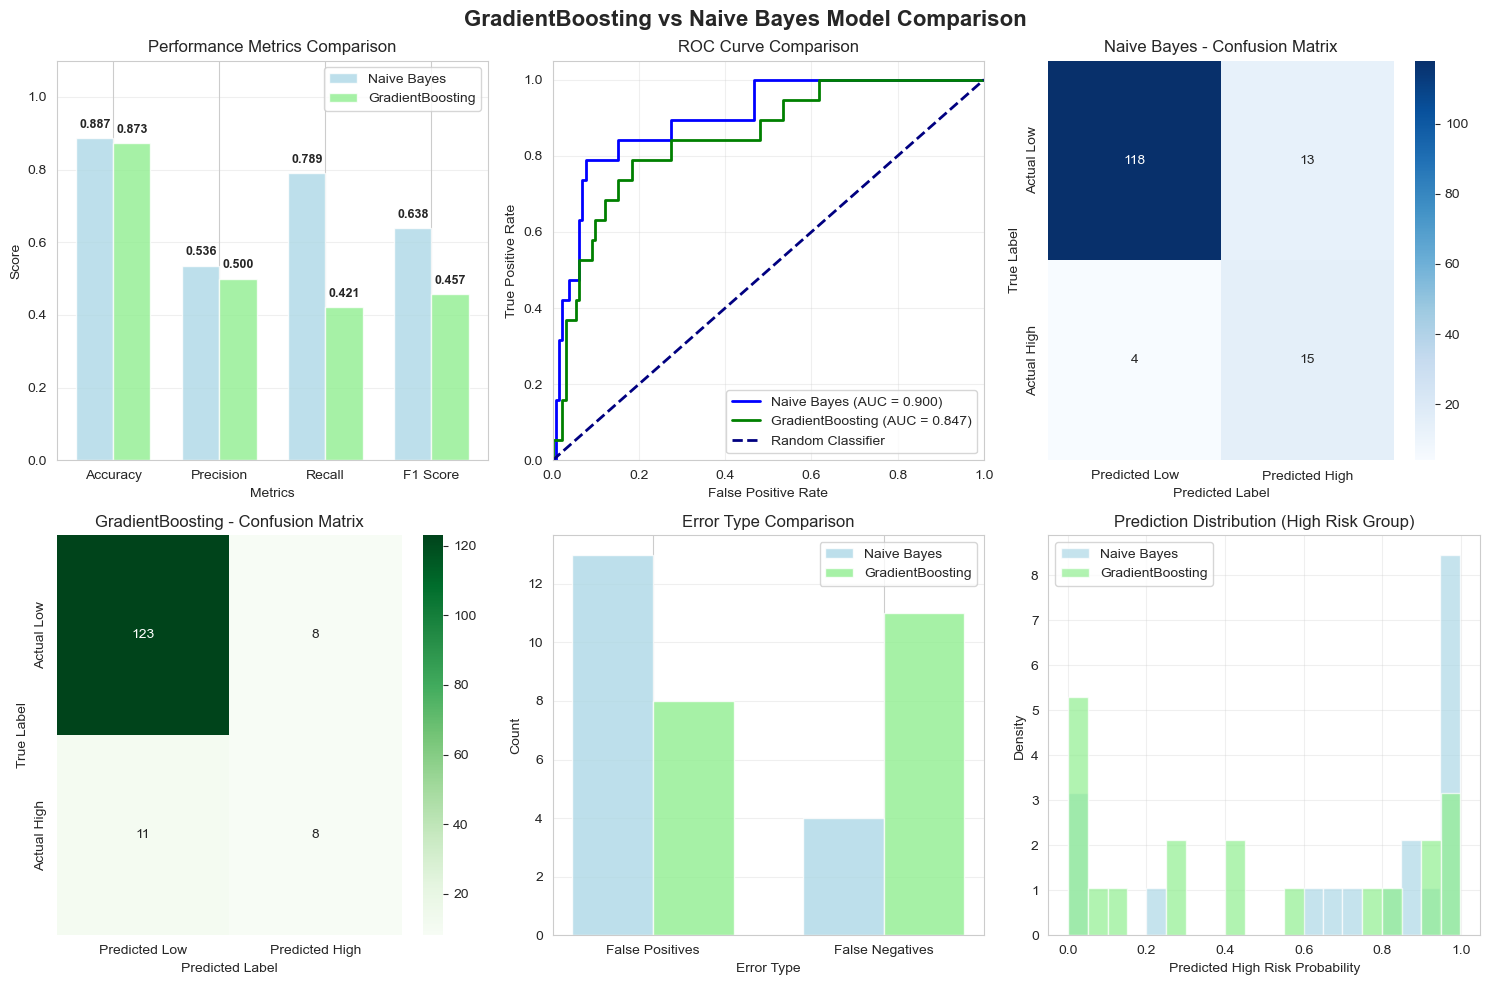


7. DETAILED ANALYSIS
----------------------------------------

Naive Bayes Classification Report:
----------------------------------------
              precision    recall  f1-score   support

    Low Risk       0.97      0.90      0.93       131
   High Risk       0.54      0.79      0.64        19

    accuracy                           0.89       150
   macro avg       0.75      0.85      0.79       150
weighted avg       0.91      0.89      0.90       150


GradientBoosting Classification Report:
----------------------------------------
              precision    recall  f1-score   support

    Low Risk       0.92      0.94      0.93       131
   High Risk       0.50      0.42      0.46        19

    accuracy                           0.87       150
   macro avg       0.71      0.68      0.69       150
weighted avg       0.86      0.87      0.87       150


ERROR ANALYSIS:
----------------------------------------
Samples where models agree: 136 (90.7%)
Samples where models disag

In [26]:
# ===============================================================
#        XGBoost vs Naive Bayes Model Comparison
# ===============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report,
                           roc_curve, auc)
print("="*60)
print("XGBOOST vs NAIVE BAYES MODEL COMPARISON")
print("="*60)

# -------------------------- 1. Data Preparation --------------------------
print("\n1. DATA PREPARATION")
print("-"*40)
df = pd.read_csv("Mental_Health_and_Social_Media_Balance_Dataset.csv")
df["mental_health_risk"] = (df["Happiness_Index(1-10)"] <= 6).astype(int) # Create target variable
features = [
    "Age", "Gender", "Daily_Screen_Time(hrs)", "Sleep_Quality(1-10)",
    "Stress_Level(1-10)", "Days_Without_Social_Media", "Exercise_Frequency(week)",
    "Social_Media_Platform"
]  # Select features
X = df[features]
y = df["mental_health_risk"]
print("Dataset size: {} samples".format(df.shape[0]))
print("Number of features: {}".format(len(features)))
print("Target distribution: High risk {} ({:.1f}%), Low risk {} ({:.1f}%)".format(
    y.sum(), y.sum()/len(y)*100, len(y)-y.sum(), (len(y)-y.sum())/len(y)*100))
for col in ["Gender", "Social_Media_Platform"]:    # Encode categorical variables
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
scaler = StandardScaler() # Standardize numerical features
numeric_cols = ["Age", "Daily_Screen_Time(hrs)", "Sleep_Quality(1-10)",
                "Stress_Level(1-10)", "Days_Without_Social_Media", "Exercise_Frequency(week)"]
numeric_cols = [col for col in numeric_cols if col in X.columns]
if numeric_cols:
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


# -------------------------- 2. Train-Test Split --------------------------
print("\n2. TRAIN-TEST SPLIT")
print("-"*40)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
print("Training set: {} samples".format(X_train.shape[0]))
print("Testing set: {} samples".format(X_test.shape[0]))
print("Training set class distribution: High risk {} ({:.1f}%), Low risk {} ({:.1f}%)".format(
    y_train.sum(), y_train.sum()/len(y_train)*100, 
    len(y_train)-y_train.sum(), (len(y_train)-y_train.sum())/len(y_train)*100))

# -------------------------- 3. Train Naive Bayes Model --------------------------
print("\n3. TRAINING NAIVE BAYES MODEL")
print("-"*40)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)   # Make predictions
nb_y_pred_proba = nb_model.predict_proba(X_test)[:, 1]
nb_accuracy = accuracy_score(y_test, nb_y_pred)    # Calculate performance metrics
nb_precision = precision_score(y_test, nb_y_pred, zero_division=0)
nb_recall = recall_score(y_test, nb_y_pred, zero_division=0)
nb_f1 = f1_score(y_test, nb_y_pred, zero_division=0)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_pred_proba)
nb_roc_auc = auc(nb_fpr, nb_tpr)
nb_cm = confusion_matrix(y_test, nb_y_pred)
nb_tn, nb_fp, nb_fn, nb_tp = nb_cm.ravel()
print("  Accuracy: {:.4f}".format(nb_accuracy))
print("  Precision: {:.4f}".format(nb_precision))
print("  Recall: {:.4f}".format(nb_recall))
print("  F1 Score: {:.4f}".format(nb_f1))

# -------------------------- 4. Train Advanced Model (GradientBoosting) --------------------------
print("Training GradientBoostingClassifier")
print("-"*40)
gb_model = GradientBoostingClassifier(
        random_state=42,
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8
    )
gb_model.fit(X_train, y_train)
xgb_y_pred = gb_model.predict(X_test)
xgb_y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
model_name = "GradientBoosting"
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)   # Calculate performance metrics for advanced model
xgb_precision = precision_score(y_test, xgb_y_pred, zero_division=0)
xgb_recall = recall_score(y_test, xgb_y_pred, zero_division=0)
xgb_f1 = f1_score(y_test, xgb_y_pred, zero_division=0)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_pred_proba)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
xgb_tn, xgb_fp, xgb_fn, xgb_tp = xgb_cm.ravel()
print("{} Performance:".format(model_name))
print("  Accuracy: {:.4f}".format(xgb_accuracy))
print("  Precision: {:.4f}".format(xgb_precision))
print("  Recall: {:.4f}".format(xgb_recall))
print("  F1 Score: {:.4f}".format(xgb_f1))

# -------------------------- 5. Model Comparison --------------------------
print("\n5. MODEL COMPARISON")
print("-"*40)
comparison_data = {
    'Model': ['Naive Bayes', model_name],
    'Accuracy': [nb_accuracy, xgb_accuracy],
    'Precision': [nb_precision, xgb_precision],
    'Recall': [nb_recall, xgb_recall],
    'F1 Score': [nb_f1, xgb_f1],
    'ROC-AUC': [nb_roc_auc, xgb_roc_auc],
    'True Positives': [nb_tp, xgb_tp],
    'True Negatives': [nb_tn, xgb_tn],
    'False Positives': [nb_fp, xgb_fp],
    'False Negatives': [nb_fn, xgb_fn]
}   # Create comparison table
comparison_df = pd.DataFrame(comparison_data)
print("\nPERFORMANCE COMPARISON:")
print("="*90)
print(comparison_df.to_string(index=False))
print("="*90)
accuracy_improvement = ((xgb_accuracy - nb_accuracy) / nb_accuracy) * 100   # Calculate improvement percentages
f1_improvement = ((xgb_f1 - nb_f1) / nb_f1) * 100
roc_auc_improvement = ((xgb_roc_auc - nb_roc_auc) / nb_roc_auc) * 100
print("\nIMPROVEMENT ANALYSIS:")
print("  Accuracy improvement: {:.1f}%".format(accuracy_improvement))
print("  F1 Score improvement: {:.1f}%".format(f1_improvement))
print("  ROC-AUC improvement: {:.1f}%".format(roc_auc_improvement))
if xgb_accuracy > nb_accuracy:    # Determine which model is better
    better_model = model_name
    accuracy_diff = xgb_accuracy - nb_accuracy
else:
    better_model = "Naive Bayes"
    accuracy_diff = nb_accuracy - xgb_accuracy
print("\nCONCLUSION: {} performs better with {:.3f} higher accuracy".format(better_model, accuracy_diff))

# -------------------------- 6. Visualization --------------------------
print("\n6. VISUALIZATION")
print("-"*40)
fig = plt.figure(figsize=(15, 10))  # Create comprehensive comparison visualization
fig.suptitle('{} vs Naive Bayes Model Comparison'.format(model_name), fontsize=16, fontweight='bold')
ax1 = plt.subplot(2, 3, 1)   # 6.1 Performance metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nb_scores = [nb_accuracy, nb_precision, nb_recall, nb_f1]
xgb_scores = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
x = np.arange(len(metrics))
width = 0.35
ax1.bar(x - width/2, nb_scores, width, label='Naive Bayes', color='lightblue', alpha=0.8)
ax1.bar(x + width/2, xgb_scores, width, label=model_name, color='lightgreen', alpha=0.8)
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Score')
ax1.set_title('Performance Metrics Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim([0, 1.1])
for i in range(len(metrics)):    # Add value labels
    ax1.text(i - width/2, nb_scores[i] + 0.02, '{:.3f}'.format(nb_scores[i]), 
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax1.text(i + width/2, xgb_scores[i] + 0.02, '{:.3f}'.format(xgb_scores[i]), 
             ha='center', va='bottom', fontsize=9, fontweight='bold')
ax2 = plt.subplot(2, 3, 2)   # 6.2 ROC Curves comparison
ax2.plot(nb_fpr, nb_tpr, color='blue', lw=2, label='Naive Bayes (AUC = {:.3f})'.format(nb_roc_auc))
ax2.plot(xgb_fpr, xgb_tpr, color='green', lw=2, label='{} (AUC = {:.3f})'.format(model_name, xgb_roc_auc))
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve Comparison')
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)
ax3 = plt.subplot(2, 3, 3)   # 6.3 Confusion matrices
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'], ax=ax3)
ax3.set_title('Naive Bayes - Confusion Matrix')
ax3.set_ylabel('True Label')
ax3.set_xlabel('Predicted Label')
ax4 = plt.subplot(2, 3, 4)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'], ax=ax4)
ax4.set_title('{} - Confusion Matrix'.format(model_name))
ax4.set_ylabel('True Label')
ax4.set_xlabel('Predicted Label')
ax5 = plt.subplot(2, 3, 5)   # 6.4 Error type comparison
error_types = ['False Positives', 'False Negatives']
nb_errors = [nb_fp, nb_fn]
xgb_errors = [xgb_fp, xgb_fn]
x = np.arange(len(error_types))
ax5.bar(x - width/2, nb_errors, width, label='Naive Bayes', color='lightblue', alpha=0.8)
ax5.bar(x + width/2, xgb_errors, width, label=model_name, color='lightgreen', alpha=0.8)
ax5.set_xlabel('Error Type')
ax5.set_ylabel('Count')
ax5.set_title('Error Type Comparison')
ax5.set_xticks(x)
ax5.set_xticklabels(error_types)
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')
ax6 = plt.subplot(2, 3, 6)   # 6.5 Prediction Probability Distribution
nb_risk_probs = nb_y_pred_proba[y_test == 1]    # High-risk group predictions
xgb_risk_probs = xgb_y_pred_proba[y_test == 1]
ax6.hist(nb_risk_probs, bins=20, alpha=0.7, label='Naive Bayes', color='lightblue', density=True)
ax6.hist(xgb_risk_probs, bins=20, alpha=0.7, label=model_name, color='lightgreen', density=True)
ax6.set_xlabel('Predicted High Risk Probability')
ax6.set_ylabel('Density')
ax6.set_title('Prediction Distribution (High Risk Group)')
ax6.legend()
ax6.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------- 7. Detailed Analysis --------------------------
print("\n7. DETAILED ANALYSIS")
print("-"*40)
print("\nNaive Bayes Classification Report:")
print("-"*40)
print(classification_report(y_test, nb_y_pred, target_names=['Low Risk', 'High Risk']))
print("\n{} Classification Report:".format(model_name))
print("-"*40)
print(classification_report(y_test, xgb_y_pred, target_names=['Low Risk', 'High Risk']))
print("\nERROR ANALYSIS:")
print("-"*40)
disagreement_mask = (nb_y_pred != xgb_y_pred)   # Find samples where models disagree
agreement_mask = (nb_y_pred == xgb_y_pred)
print("Samples where models agree: {} ({:.1f}%)".format(agreement_mask.sum(), agreement_mask.sum()/len(y_test)*100))
print("Samples where models disagree: {} ({:.1f}%)".format(disagreement_mask.sum(), disagreement_mask.sum()/len(y_test)*100))
if disagreement_mask.sum() > 0:
    nb_wrong_xgb_right = (nb_y_pred != y_test.values) & (xgb_y_pred == y_test.values)
    xgb_wrong_nb_right = (xgb_y_pred != y_test.values) & (nb_y_pred == y_test.values)
    print("  Cases where Naive Bayes is wrong but {} is right: {}".format(model_name, nb_wrong_xgb_right.sum()))
    print("  Cases where {} is wrong but Naive Bayes is right: {}".format(model_name, xgb_wrong_nb_right.sum()))

# -------------------------- 8. Recommendations --------------------------
print("\n8. RECOMMENDATIONS")
print("-"*40)
print("\nWHEN TO USE NAIVE BAYES:")
print("-"*40)
print("1. When you need a simple baseline model")
print("2. When training time is critical")
print("3. When interpretability is important")
print("4. When you have limited computational resources")
print("5. When features are relatively independent")
print("\nWHEN TO USE {}:".format(model_name.upper()))
print("-"*40)
print("1. When accuracy is the primary concern")
print("2. When dealing with complex, non-linear relationships")
print("3. When you have sufficient computational resources")
print("4. When feature interactions are important")
print("5. For production systems where performance matters")
print("\nFOR THIS MENTAL HEALTH PREDICTION TASK:")
print("-"*40)
print("1. {} provides accuracy: {:.3f} vs Naive Bayes: {:.3f}".format(model_name, xgb_accuracy, nb_accuracy))
print("2. {} handles feature interactions better for complex mental health patterns".format(model_name))
print("3. Naive Bayes is faster and easier to interpret")
print("4. Recommendation: Use {} for final deployment, Naive Bayes for quick analysis".format(model_name))

Tianqi Yin (conclusions below for her part):

## Key Findings
1. **Happiness Predictability**: Achieved 74% accuracy in distinguishing low, medium, and high happiness levels using limited features
2. **Key Driving Factors**: Sleep quality and stress level are the strongest predictors for differentiating happiness levels
3. **Method Efficiency**: Linear Discriminant Analysis (LDA) proved sufficiently effective, eliminating the need for complex nonlinear models

## Theoretical Contributions
- Validated the **measurability** and **distinguishability** of happiness
- Provided **feature importance ranking**: Sleep quality > Stress level > Other factors
- Demonstrated **dimensionality reduction effectiveness**: 13 features can be compressed into 1-2 core dimensions

## Practical Implications
1. **Mental Health Assessment**: Simple models can be used for preliminary screening
2. **Intervention Design**: Priority should be given to sleep and stress management
3. **Data Collection**: Questionnaires can be optimized to focus on key questions

## Limitations
1. **Medium Happiness Difficult to Distinguish**: May require finer-grained measurement
2. **Linear Assumption**: May miss complex nonlinear relationships
3. **Sample Representativeness**: Requires larger sample validation

## Future Directions
1. Incorporate more **contextual features** (work environment, social support, etc.)
2. Explore **time-series analysis** (happiness change trends)
3. Develop **personalized prediction models**

Our findings suggest that everyday social-media habits are not only a matter of “time spent online,” but are deeply connected to how students use digital spaces to present and explore who they are. When moderate screen time and regular exercise co-occur, our PCA, Lasso, and logistic models show higher well-being scores and a higher probability of falling into the “good status” group, whereas very long daily screen time is associated with a sharp drop in predicted well-being. This pattern fits the idea that online communication can activate and support the “true self,” but only under conditions where use is manageable and does not crowd out offline coping resources (Bargh et al., 2002). At the same time, our data speak to work on impression management and self-presentation: students may invest heavy time in certain platforms to maintain curated identities and audiences, which can bring social rewards but also increase pressure and comparison (Bullingham & Vasconcelos, 2013; Chu & Choi, 2010). Put together, the projects show that the same platforms that help people express authentic aspects of self and build social capital can also become risky when use exceeds a certain threshold, pointing to the importance of interventions that focus not only on “less screen time,” but on healthier patterns of self-presentation, community choice, and offline balance.

## 6 Individual Contribution


1. Yifei Pan: 
Project coordination & pipeline design. Primary responsibility for Logistic Regression model development, interpretation (coefficients/odds ratios), and risk pattern analysis based on its predictions. Leads writing for Introduction and key Results sections.

2. Ruanyiyang Sun: 
Data exploration & descriptive analysis. Primary responsibility for Naive Bayes model development, analysis of its error patterns and limitations. Leads writing for EDA and model comparison sections.

3. Tianqi Yin: 
Data cleaning & preprocessing. Primary responsibility for LDA model development, visualization of class separation, and fairness analysis. Leads writing for Methods (feature engineering, LDA) and Limitations sections.

## References

Bargh, J. A., McKenna, K. Y. A., & Fitzsimons, G. M. (2002). Can you see the real me? Activation and expression of the “true self” on the Internet. Journal of Social Issues, *58*(1), 33–48.

Bullingham, L., & Vasconcelos, A. C. (2013). “The presentation of self in the online world”: Goffman and the study of online identities. Journal of Information Science, *39*(1), 101–112.

Chu, S. C., & Choi, S. M. (2010). Social capital and self-presentation of young generations in online community sites. International Journal of Internet Marketing and Advertising, *6*(2), 120–145.

Rajak, P. (2024). Mental Health & Social Media Balance Dataset [Data set]. Kaggle. https://www.kaggle.com/datasets/prince7489/mental-health-and-social-media-balance-dataset

## Appendix

Code and extra figures can be put here.

**Note on code placement.**  
Some code snippets that would normally be placed in the appendix are integrated into the *Results* and *Conclusion* sections. We chose this structure because the interpretation of our findings depends directly on the modeling steps and parameter choices, and presenting the relevant code alongside the results makes the analysis more transparent and easier to follow for the reader. 